# Fall 2024 Final Project (OPIM 5512 and 5509)
**Dr. Dave Wanik - Dept. of Operations and Information Management - University of Connecticut**

Can you predict the level of problematic internet usage exhibited by children and adolescents, based on their physical activity? The goal of this competition is to develop a predictive model that analyzes children's physical activity and fitness data to identify early signs of problematic internet use. Identifying these patterns can help trigger interventions to encourage healthier digital habits.

For our final project (5512 and 5509), we are going to use a simplified version of this Kaggle competition. On your own, you are welcome to submit to the final competition (and I hope you try!)

* https://www.kaggle.com/competitions/child-mind-institute-problematic-internet-use/data

* Group Number: 07
* Names of Groups Members: Uday Ganesh Boddu, Oohashree Kandregula, Haozhou Zhu

By submitting this project, I accept responsibility for my role in ensuring the integrity of the work submitted by the group in which I participated.


# Step 1: Loading Data

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading training and testing ids to keep the training and datasets consistents with Professor's datasets.
y_train=pd.read_csv('/content/drive/MyDrive/Python_Group_Project/F24_DS_DL_finalProject_data_withID/y_train_F24_withID.csv')
y_test=pd.read_csv('/content/drive/MyDrive/Python_Group_Project/F24_DS_DL_finalProject_data_withID/y_test_F24_withID.csv')

In [ ]:
y_train

,Unnamed: 0,sii,id
0,626,1.0,a0522c83
1,307,1.0,4a4a0f78
2,662,1.0,a8b0428d
3,394,0.0,6282e693
4,644,0.0,a4530b41
...,...,...,...
792,270,0.0,40aae75f
793,860,1.0,e0869709
794,435,1.0,6dfe4a75
795,102,0.0,19098ef0


In [ ]:
y_test

,Unnamed: 0,sii,id
0,832,1.0,d8037389
1,970,1.0,fa34f945
2,96,0.0,15f2e240
3,587,1.0,98ed2153
4,450,1.0,7187caec
...,...,...,...
196,855,1.0,df556fd2
197,65,0.0,0eddd8e5
198,141,1.0,22c72c4e
199,827,0.0,d6776176


In [ ]:
print(y_train.shape)
print(y_test.shape)

(797, 3)
(201, 3)


In [ ]:
# Drop the last row ( its a missing value)
y_train = y_train.drop(y_train.index[-1])

y_test = y_test.drop(y_test.index[-1])

In [ ]:
print(y_train.shape)
print(y_test.shape)

(796, 3)
(200, 3)


In [ ]:
import os
import pandas as pd

folder_path = "/content/drive/MyDrive/Python_Group_Project/MinFC_results"

def extract_id(filename):
    return filename.split('=')[1].split('.')[0]

file_data = []
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_id = extract_id(filename)
        file_path = os.path.join(folder_path, filename)
        csv_data = pd.read_csv(file_path)
        csv_data['id'] = file_id
        file_data.append(csv_data)

combined_data = pd.concat(file_data, ignore_index=True)

# Ensure 'id' columns have the same data type
y_train['id'] = y_train['id'].astype(str)
combined_data['id'] = combined_data['id'].astype(str)

# Merge y_train with combined_data
result = pd.merge(y_train, combined_data, on='id', how='left')

In [ ]:
final_train=result.copy()
final_train

,Unnamed: 0,sii,id,X__absolute_maximum,X__length,X__maximum,X__mean,X__median,X__minimum,X__root_mean_square,...,weekday__absolute_maximum,weekday__length,weekday__maximum,weekday__mean,weekday__median,weekday__minimum,weekday__root_mean_square,weekday__standard_deviation,weekday__sum_values,weekday__variance
0,626,1.0,a0522c83,2.106928,400632.0,1.173187,-0.505789,-0.716905,-2.106928,0.752703,...,7.0,400632.0,7.0,4.012999,4.0,1.0,4.447266,1.916770,1607736.0,3.674006
1,307,1.0,4a4a0f78,7.935687,380312.0,7.935687,0.121610,0.182309,-7.919588,0.592448,...,7.0,380312.0,7.0,3.897484,4.0,1.0,4.385669,2.010898,1482260.0,4.043709
2,662,1.0,a8b0428d,1.024297,1386.0,1.024297,-0.275158,-0.458828,-0.996849,0.474399,...,7.0,1386.0,7.0,5.284993,5.0,1.0,5.341512,0.774982,7325.0,0.600597
3,394,0.0,6282e693,1.700533,137029.0,1.463910,-0.256388,-0.394569,-1.700533,0.599787,...,7.0,137029.0,7.0,3.682242,4.0,1.0,4.055526,1.699524,504574.0,2.888383
4,644,0.0,a4530b41,8.022779,407268.0,8.022779,0.016842,0.026158,-1.224444,0.555549,...,7.0,407268.0,7.0,4.200448,4.0,1.0,4.670652,2.042359,1710708.0,4.171229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,106,0.0,1a803bfe,1.013293,392760.0,1.003959,-0.131233,-0.095426,-1.013293,0.317311,...,7.0,392760.0,7.0,3.987840,4.0,1.0,4.430631,1.930706,1566264.0,3.727625
792,270,0.0,40aae75f,3.417385,341668.0,3.417385,-0.179227,-0.335388,-3.029212,0.635307,...,7.0,341668.0,7.0,3.837064,4.0,1.0,4.295309,1.930444,1311002.0,3.726616
793,860,1.0,e0869709,1.633802,8183.0,0.993073,-0.490645,-0.565156,-1.633802,0.618899,...,7.0,8183.0,7.0,4.934865,5.0,1.0,5.002773,0.821491,40382.0,0.674848
794,435,1.0,6dfe4a75,1.778130,388032.0,1.037105,-0.014062,-0.016541,-1.778130,0.547439,...,7.0,388032.0,7.0,3.973559,4.0,1.0,4.422175,1.940738,1541868.0,3.766464


Dropped the columns of 'PCIAT' as told to do so in announcemnt

In [ ]:
import pandas as pd

# Remove columns containing 'PCIAT'
final_train = final_train.loc[:, ~final_train.columns.str.contains('PCIAT')]

# Print the updated dataframe
final_train


,Unnamed: 0,sii,id,X__absolute_maximum,X__length,X__maximum,X__mean,X__median,X__minimum,X__root_mean_square,...,weekday__absolute_maximum,weekday__length,weekday__maximum,weekday__mean,weekday__median,weekday__minimum,weekday__root_mean_square,weekday__standard_deviation,weekday__sum_values,weekday__variance
0,626,1.0,a0522c83,2.106928,400632.0,1.173187,-0.505789,-0.716905,-2.106928,0.752703,...,7.0,400632.0,7.0,4.012999,4.0,1.0,4.447266,1.916770,1607736.0,3.674006
1,307,1.0,4a4a0f78,7.935687,380312.0,7.935687,0.121610,0.182309,-7.919588,0.592448,...,7.0,380312.0,7.0,3.897484,4.0,1.0,4.385669,2.010898,1482260.0,4.043709
2,662,1.0,a8b0428d,1.024297,1386.0,1.024297,-0.275158,-0.458828,-0.996849,0.474399,...,7.0,1386.0,7.0,5.284993,5.0,1.0,5.341512,0.774982,7325.0,0.600597
3,394,0.0,6282e693,1.700533,137029.0,1.463910,-0.256388,-0.394569,-1.700533,0.599787,...,7.0,137029.0,7.0,3.682242,4.0,1.0,4.055526,1.699524,504574.0,2.888383
4,644,0.0,a4530b41,8.022779,407268.0,8.022779,0.016842,0.026158,-1.224444,0.555549,...,7.0,407268.0,7.0,4.200448,4.0,1.0,4.670652,2.042359,1710708.0,4.171229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,106,0.0,1a803bfe,1.013293,392760.0,1.003959,-0.131233,-0.095426,-1.013293,0.317311,...,7.0,392760.0,7.0,3.987840,4.0,1.0,4.430631,1.930706,1566264.0,3.727625
792,270,0.0,40aae75f,3.417385,341668.0,3.417385,-0.179227,-0.335388,-3.029212,0.635307,...,7.0,341668.0,7.0,3.837064,4.0,1.0,4.295309,1.930444,1311002.0,3.726616
793,860,1.0,e0869709,1.633802,8183.0,0.993073,-0.490645,-0.565156,-1.633802,0.618899,...,7.0,8183.0,7.0,4.934865,5.0,1.0,5.002773,0.821491,40382.0,0.674848
794,435,1.0,6dfe4a75,1.778130,388032.0,1.037105,-0.014062,-0.016541,-1.778130,0.547439,...,7.0,388032.0,7.0,3.973559,4.0,1.0,4.422175,1.940738,1541868.0,3.766464


In [ ]:
final_train.head()

,Unnamed: 0,sii,id,X__absolute_maximum,X__length,X__maximum,X__mean,X__median,X__minimum,X__root_mean_square,...,weekday__absolute_maximum,weekday__length,weekday__maximum,weekday__mean,weekday__median,weekday__minimum,weekday__root_mean_square,weekday__standard_deviation,weekday__sum_values,weekday__variance
0,626,1.0,a0522c83,2.106928,400632.0,1.173187,-0.505789,-0.716905,-2.106928,0.752703,...,7.0,400632.0,7.0,4.012999,4.0,1.0,4.447266,1.916770,1607736.0,3.674006
1,307,1.0,4a4a0f78,7.935687,380312.0,7.935687,0.121610,0.182309,-7.919588,0.592448,...,7.0,380312.0,7.0,3.897484,4.0,1.0,4.385669,2.010898,1482260.0,4.043709
2,662,1.0,a8b0428d,1.024297,1386.0,1.024297,-0.275158,-0.458828,-0.996849,0.474399,...,7.0,1386.0,7.0,5.284993,5.0,1.0,5.341512,0.774982,7325.0,0.600597
3,394,0.0,6282e693,1.700533,137029.0,1.463910,-0.256388,-0.394569,-1.700533,0.599787,...,7.0,137029.0,7.0,3.682242,4.0,1.0,4.055526,1.699524,504574.0,2.888383
4,644,0.0,a4530b41,8.022779,407268.0,8.022779,0.016842,0.026158,-1.224444,0.555549,...,7.0,407268.0,7.0,4.200448,4.0,1.0,4.670652,2.042359,1710708.0,4.171229


In [ ]:
final_train.shape

(796, 133)

In [ ]:
#test import
import os
import pandas as pd

folder_path = "/content/drive/MyDrive/Python_Group_Project/MinFC_results"

def extract_id(filename):
    return filename.split('=')[1].split('.')[0]

file_data = []
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_id = extract_id(filename)
        file_path = os.path.join(folder_path, filename)
        csv_data = pd.read_csv(file_path)
        csv_data['id'] = file_id
        file_data.append(csv_data)

combined_data = pd.concat(file_data, ignore_index=True)

# Ensure 'id' columns have the same data type
y_test['id'] = y_test['id'].astype(str)
combined_data['id'] = combined_data['id'].astype(str)

# Merge y_test with combined_data
result = pd.merge(y_test, combined_data, on='id', how='left')

In [ ]:
final_test=result.copy()
final_test

,Unnamed: 0,sii,id,X__absolute_maximum,X__length,X__maximum,X__mean,X__median,X__minimum,X__root_mean_square,...,weekday__absolute_maximum,weekday__length,weekday__maximum,weekday__mean,weekday__median,weekday__minimum,weekday__root_mean_square,weekday__standard_deviation,weekday__sum_values,weekday__variance
0,832,1.0,d8037389,1.208483,330252.0,1.208483,0.143036,0.015998,-1.083477,0.424535,...,7.0,330252.0,7.0,3.997929,4.0,1.0,4.509118,2.085356,1320324.0,4.348711
1,970,1.0,fa34f945,1.035127,402912.0,1.026294,0.006469,0.010479,-1.035127,0.269633,...,7.0,402912.0,7.0,4.117763,4.0,1.0,4.553824,1.944568,1659096.0,3.781343
2,96,0.0,15f2e240,1.470279,206585.0,1.470279,0.067980,0.162901,-1.366556,0.622645,...,7.0,206585.0,7.0,3.828579,4.0,1.0,4.296379,1.949579,790927.0,3.800859
3,587,1.0,98ed2153,1.920816,414420.0,1.840322,-0.018163,-0.002206,-1.920816,0.504786,...,7.0,414420.0,7.0,4.146489,4.0,1.0,4.632862,2.066408,1718388.0,4.270042
4,450,1.0,7187caec,2.169161,409296.0,1.741047,-0.013084,0.009984,-2.169161,0.417657,...,7.0,409296.0,7.0,4.147766,4.0,1.0,4.582896,1.949095,1697664.0,3.798970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,490,1.0,7f44236f,1.365555,399744.0,1.007708,-0.043248,-0.000743,-1.365555,0.337015,...,7.0,399744.0,7.0,3.913124,4.0,1.0,4.366537,1.937550,1564248.0,3.754100
196,855,1.0,df556fd2,1.219189,399780.0,1.142854,-0.114357,-0.011891,-1.219189,0.527271,...,7.0,399780.0,7.0,4.212307,4.0,1.0,4.675292,2.028503,1683996.0,4.114824
197,65,0.0,0eddd8e5,7.949660,360180.0,7.929402,0.221413,0.319227,-7.949660,0.641653,...,7.0,360180.0,7.0,4.022489,4.0,1.0,4.488032,1.990481,1448820.0,3.962013
198,141,1.0,22c72c4e,1.461321,396384.0,1.348954,0.168034,0.039235,-1.461321,0.303083,...,7.0,396384.0,7.0,4.164870,4.0,1.0,4.619868,1.999259,1650888.0,3.997037


In [ ]:
final_test.shape

(200, 143)

In [ ]:
import pandas as pd

# Remove columns containing 'PCIAT'
final_test = final_test.loc[:, ~final_test.columns.str.contains('PCIAT')]

# Print the updated dataframe
final_test


,Unnamed: 0,sii,id,X__absolute_maximum,X__length,X__maximum,X__mean,X__median,X__minimum,X__root_mean_square,...,weekday__absolute_maximum,weekday__length,weekday__maximum,weekday__mean,weekday__median,weekday__minimum,weekday__root_mean_square,weekday__standard_deviation,weekday__sum_values,weekday__variance
0,832,1.0,d8037389,1.208483,330252.0,1.208483,0.143036,0.015998,-1.083477,0.424535,...,7.0,330252.0,7.0,3.997929,4.0,1.0,4.509118,2.085356,1320324.0,4.348711
1,970,1.0,fa34f945,1.035127,402912.0,1.026294,0.006469,0.010479,-1.035127,0.269633,...,7.0,402912.0,7.0,4.117763,4.0,1.0,4.553824,1.944568,1659096.0,3.781343
2,96,0.0,15f2e240,1.470279,206585.0,1.470279,0.067980,0.162901,-1.366556,0.622645,...,7.0,206585.0,7.0,3.828579,4.0,1.0,4.296379,1.949579,790927.0,3.800859
3,587,1.0,98ed2153,1.920816,414420.0,1.840322,-0.018163,-0.002206,-1.920816,0.504786,...,7.0,414420.0,7.0,4.146489,4.0,1.0,4.632862,2.066408,1718388.0,4.270042
4,450,1.0,7187caec,2.169161,409296.0,1.741047,-0.013084,0.009984,-2.169161,0.417657,...,7.0,409296.0,7.0,4.147766,4.0,1.0,4.582896,1.949095,1697664.0,3.798970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,490,1.0,7f44236f,1.365555,399744.0,1.007708,-0.043248,-0.000743,-1.365555,0.337015,...,7.0,399744.0,7.0,3.913124,4.0,1.0,4.366537,1.937550,1564248.0,3.754100
196,855,1.0,df556fd2,1.219189,399780.0,1.142854,-0.114357,-0.011891,-1.219189,0.527271,...,7.0,399780.0,7.0,4.212307,4.0,1.0,4.675292,2.028503,1683996.0,4.114824
197,65,0.0,0eddd8e5,7.949660,360180.0,7.929402,0.221413,0.319227,-7.949660,0.641653,...,7.0,360180.0,7.0,4.022489,4.0,1.0,4.488032,1.990481,1448820.0,3.962013
198,141,1.0,22c72c4e,1.461321,396384.0,1.348954,0.168034,0.039235,-1.461321,0.303083,...,7.0,396384.0,7.0,4.164870,4.0,1.0,4.619868,1.999259,1650888.0,3.997037


> - At the end of step-1: We see that train data has 796 rows and test data had 200 rows. with 133 columns each

In [ ]:
final_train.isna().sum().sum()

0

In [ ]:
final_test.isna().sum().sum()

0

NO Null values in our both train and test dataframes

#  Step 1.2 Feature Engineering


> Its very complex and difficult to choose the important features from 133 columns

> so will be going with the different strategies by dropping the features and of choosing the important one's.



In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Separate features and target
X = final_train.drop(['sii', 'id'], axis=1)
y = final_train['sii']

# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Calculate correlation with target
corr_with_target = X.corrwith(y).abs().sort_values(ascending=False)

# Get top features
top_mi_features = mi_scores.nlargest(50).index.tolist()
top_corr_features = corr_with_target.nlargest(50).index.tolist()
combined_features = list(set(top_mi_features + top_corr_features))


# Step 1: All Features
print("Step 1: All Features")
print(f"Number of features: {X.shape[1]}")


Step 1: All Features
Number of features: 131


In [ ]:
top_mi_features

['enmo__root_mean_square',
 'Y__mean',
 'Y__root_mean_square',
 'time_of_day__maximum',
 'quarter__mean',
 'non-wear_flag__minimum',
 'non-wear_flag__sum_values',
 'enmo__variance',
 'quarter__standard_deviation',
 'enmo__standard_deviation',
 'time_of_day__standard_deviation',
 'time_of_day__variance',
 'battery_voltage__sum_values',
 'X__standard_deviation',
 'time_of_day__sum_values',
 'X__variance',
 'index__minimum',
 'Z__minimum',
 'weekday__absolute_maximum',
 'quarter__variance',
 'anglez__median',
 'battery_voltage__median',
 'non-wear_flag__root_mean_square',
 'quarter__minimum',
 'light__standard_deviation',
 'non-wear_flag__mean',
 'enmo__mean',
 'non-wear_flag__median',
 'enmo__sum_values',
 'X__root_mean_square',
 'Y__standard_deviation',
 'Y__variance',
 'Y__sum_values',
 'Z__variance',
 'light__mean',
 'Z__standard_deviation',
 'Z__maximum',
 'light__variance',
 'enmo__median',
 'enmo__maximum',
 'enmo__absolute_maximum',
 'battery_voltage__variance',
 'anglez__mean',
 

In [ ]:
top_corr_features

['enmo__sum_values',
 'enmo__root_mean_square',
 'enmo__standard_deviation',
 'enmo__mean',
 'enmo__variance',
 'enmo__median',
 'Y__maximum',
 'Y__absolute_maximum',
 'X__minimum',
 'light__standard_deviation',
 'light__root_mean_square',
 'Y__minimum',
 'light__mean',
 'light__variance',
 'X__absolute_maximum',
 'light__sum_values',
 'enmo__absolute_maximum',
 'enmo__maximum',
 'X__standard_deviation',
 'X__variance',
 'non-wear_flag__sum_values',
 'time_of_day__standard_deviation',
 'time_of_day__variance',
 'non-wear_flag__mean',
 'non-wear_flag__root_mean_square',
 'X__maximum',
 'non-wear_flag__median',
 'X__root_mean_square',
 'Z__maximum',
 'Z__root_mean_square',
 'Z__variance',
 'Z__absolute_maximum',
 'non-wear_flag__variance',
 'anglez__variance',
 'non-wear_flag__standard_deviation',
 'anglez__standard_deviation',
 'anglez__root_mean_square',
 'Z__standard_deviation',
 'weekday__variance',
 'anglez__maximum',
 'weekday__standard_deviation',
 'non-wear_flag__absolute_maximum

In [ ]:
combined_features

['enmo__standard_deviation',
 'Z__minimum',
 'Y__standard_deviation',
 'enmo__maximum',
 'Z__standard_deviation',
 'battery_voltage__variance',
 'battery_voltage__root_mean_square',
 'battery_voltage__median',
 'light__root_mean_square',
 'weekday__absolute_maximum',
 'non-wear_flag__median',
 'non-wear_flag__absolute_maximum',
 'time_of_day__sum_values',
 'Z__root_mean_square',
 'quarter__mean',
 'anglez__standard_deviation',
 'quarter__standard_deviation',
 'weekday__standard_deviation',
 'X__variance',
 'time_of_day__maximum',
 'enmo__median',
 'non-wear_flag__mean',
 'enmo__variance',
 'X__standard_deviation',
 'anglez__median',
 'battery_voltage__mean',
 'Y__variance',
 'index__minimum',
 'light__standard_deviation',
 'non-wear_flag__minimum',
 'time_of_day__mean',
 'Y__root_mean_square',
 'X__root_mean_square',
 'non-wear_flag__root_mean_square',
 'quarter__variance',
 'light__variance',
 'light__sum_values',
 'light__median',
 'Y__sum_values',
 'battery_voltage__sum_values',
 'Y

## PLOT 1: Correlation matrix

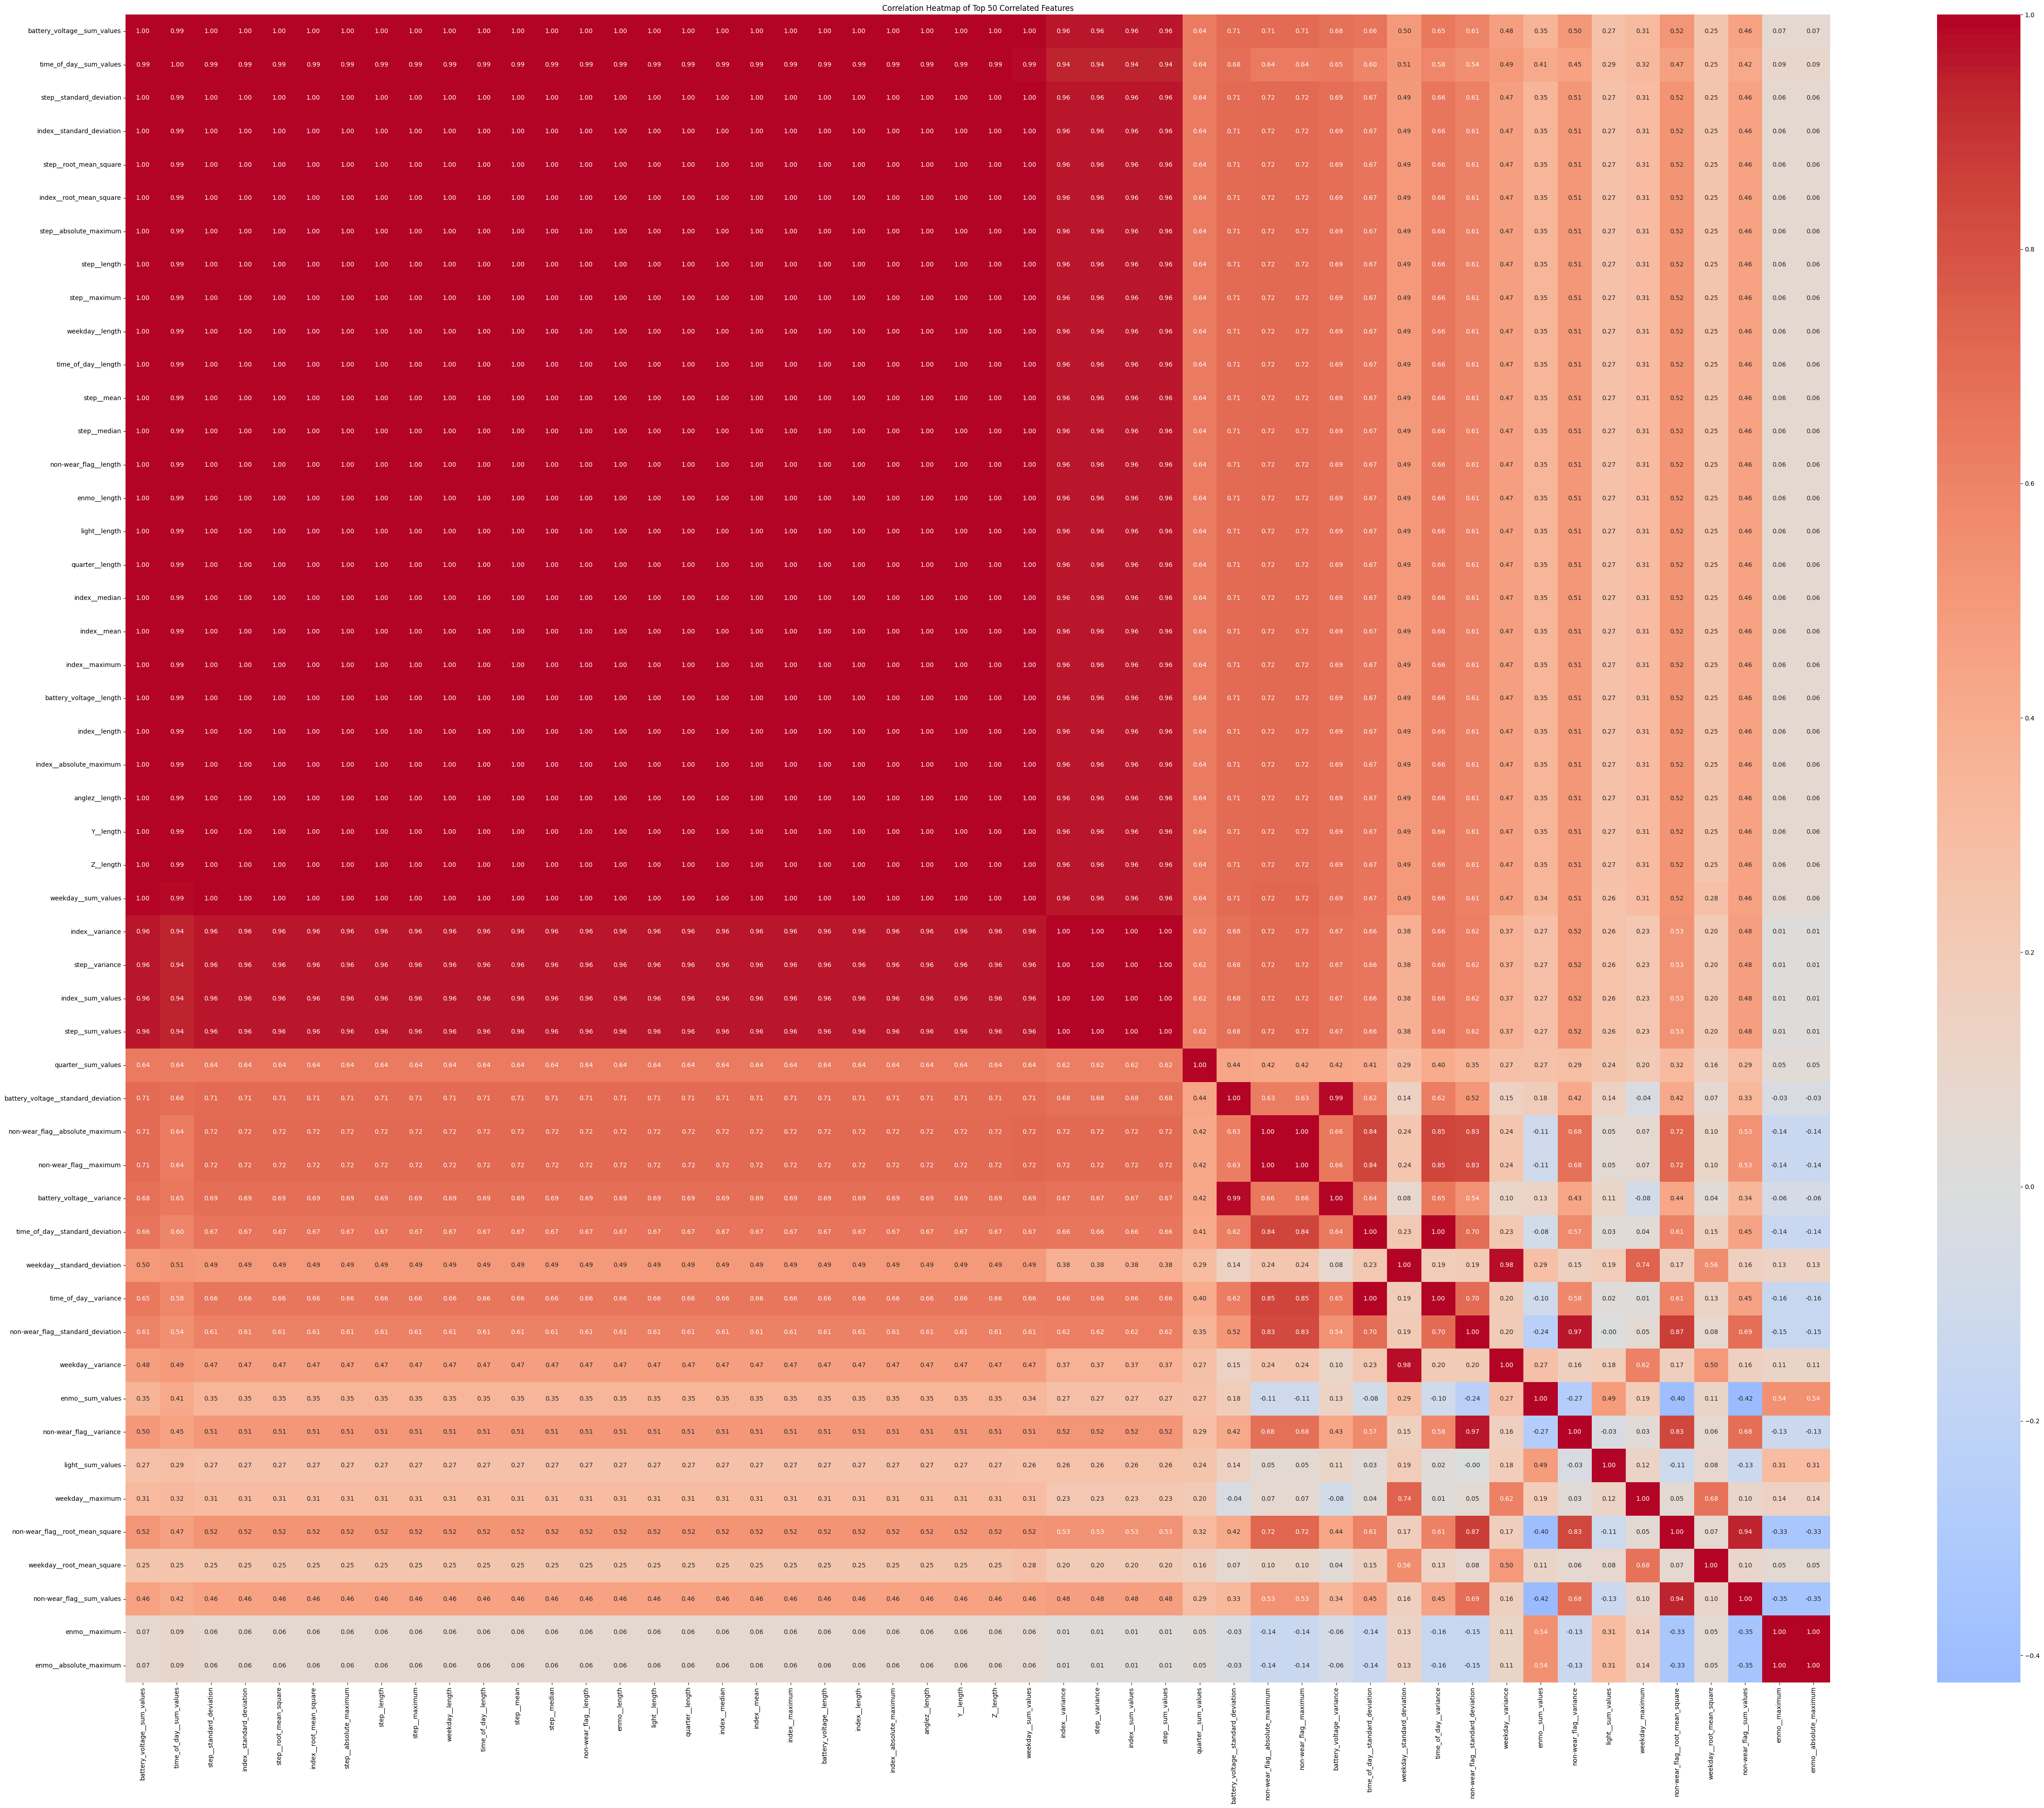

In [ ]:
# Plot 1: Correlation Heatmap (top 50 features)
plt.figure(figsize=(50, 40))
corr_matrix = X.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

# Select top 50 from these highly correlated features
top_corr_features = corr_matrix.loc[to_drop, to_drop].mean().sort_values(ascending=False).index[:50]
sns.heatmap(X[top_corr_features].corr(), cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title('Correlation Heatmap of Top 50 Correlated Features')
plt.tight_layout()
plt.show()

features from upper where the correlation exceeds 0.5 are identified and dropped.

* Highly Correlated Features: Features like `light__variance` and `light__standard_deviation` were highly correlated. columns representing variance (e.g., feature__variance) were dropped.
* Redundant Features: Features such as mean and sum_values were found to have high correlations. Hence, `feature__sum_values` columns were dropped to avoid redundancy.
*  Features with Low Variance: Features like `index__minimum` and `non-wear_flag__minimum` likely exhibited minimal variance across the dataset. These were also dropped.

*  Final Feature Set: After the above considerations, features that provided unique and meaningful information were retained, ensuring the dataset's relevance and reducing multicollinearity.

In [ ]:
# Step 2: Feature Selection based on Correlation
corr_with_target = X.corrwith(y).abs().sort_values(ascending=False)
top_corr_features = corr_with_target.nlargest(50).index.tolist()
X_corr = X[top_corr_features]

print("\nStep 2: Correlation-based Feature upholding")
print(f"Number of features: {X_corr.shape[1]}")


Step 2: Correlation-based Feature upholding
Number of features: 50


In [ ]:
# Table 2: Top correlated features
print(corr_with_target[top_corr_features])

enmo__sum_values                     0.204039
enmo__root_mean_square               0.195276
enmo__standard_deviation             0.192347
enmo__mean                           0.189032
enmo__variance                       0.154964
enmo__median                         0.129988
Y__maximum                           0.125938
Y__absolute_maximum                  0.117488
X__minimum                           0.109821
light__standard_deviation            0.108810
light__root_mean_square              0.107480
Y__minimum                           0.102492
light__mean                          0.100843
light__variance                      0.099072
X__absolute_maximum                  0.097534
light__sum_values                    0.091171
enmo__absolute_maximum               0.090515
enmo__maximum                        0.090515
X__standard_deviation                0.089069
X__variance                          0.087601
non-wear_flag__sum_values            0.084426
time_of_day__standard_deviation   

In [ ]:
# Step 3: Mutual Information
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
top_mi_features = mi_scores.nlargest(20).index.tolist()
X_mi = X[top_mi_features]

print("\nStep 3: Mutual Information-based Feature Selection")
print(f"Number of features: {X_mi.shape[1]}")


Step 3: Mutual Information-based Feature Selection
Number of features: 20


## PLOT 2 : Bar Plot


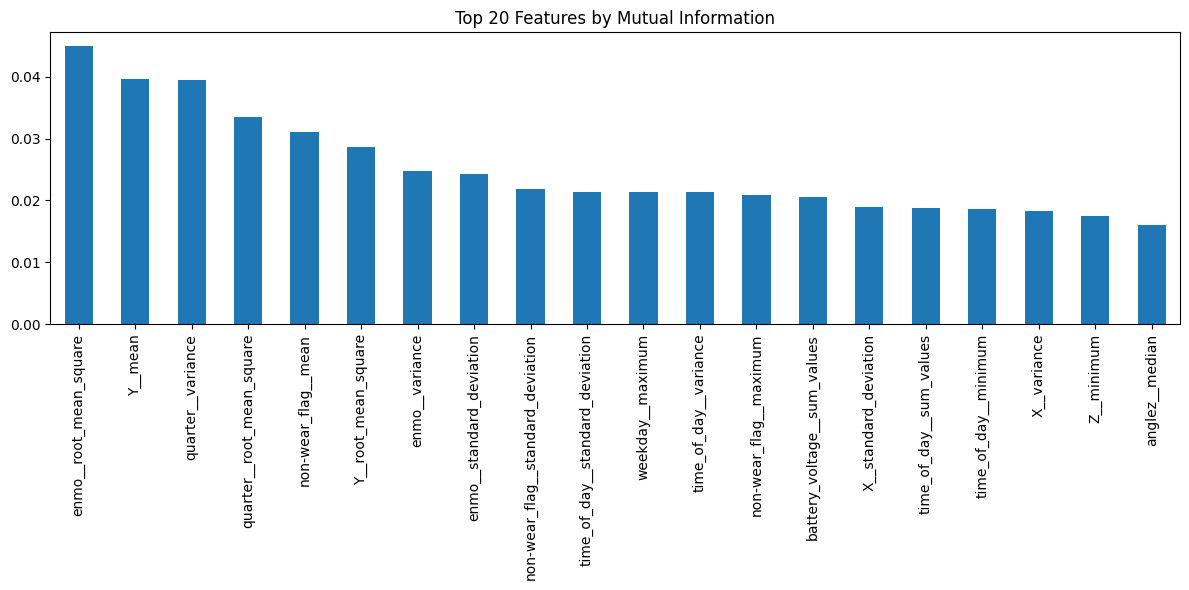

In [ ]:
# Plot 2: Bar plot of top MI features
plt.figure(figsize=(12, 6))
mi_scores[top_mi_features].plot(kind='bar')
plt.title('Top 20 Features by Mutual Information')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The correlation matrix shows strong positive correlations between several sensor-related features (e.g., X__standard_deviation and enmo__variance), while other features like battery_voltage__mean and anglez__median appear to have weak correlations with most other variables.

In [ ]:
# Top MI features
print(mi_scores[top_mi_features])

enmo__root_mean_square               0.044938
Y__mean                              0.039699
quarter__variance                    0.039413
quarter__root_mean_square            0.033567
non-wear_flag__mean                  0.031124
Y__root_mean_square                  0.028695
enmo__variance                       0.024777
enmo__standard_deviation             0.024359
non-wear_flag__standard_deviation    0.021924
time_of_day__standard_deviation      0.021423
weekday__maximum                     0.021327
time_of_day__variance                0.021320
non-wear_flag__maximum               0.020909
battery_voltage__sum_values          0.020548
X__standard_deviation                0.018977
time_of_day__sum_values              0.018703
time_of_day__minimum                 0.018651
X__variance                          0.018228
Z__minimum                           0.017562
anglez__median                       0.016063
dtype: float64


In [ ]:
# Step 4: Combine Correlation and MI features
combined_features = list(set(top_corr_features + top_mi_features))
X_comb = X[combined_features]

print("\nStep 4: Combined Feature Selection")
print(f"Number of features: {X_comb.shape[1]}")


Step 4: Combined Feature Selection
Number of features: 59


## PLOT 3 : PCA

PCA Explained Variance Ratio for 15 Components:
[1.00000000e+00 1.04459066e-15 2.82490467e-16 1.88975400e-16
 1.74737192e-16 1.29586770e-16 1.04715490e-16 9.15426790e-17
 7.74275383e-17 3.82490134e-17 3.53644893e-17 2.98939190e-17
 4.25403641e-18 1.00607876e-18 7.51629893e-30]


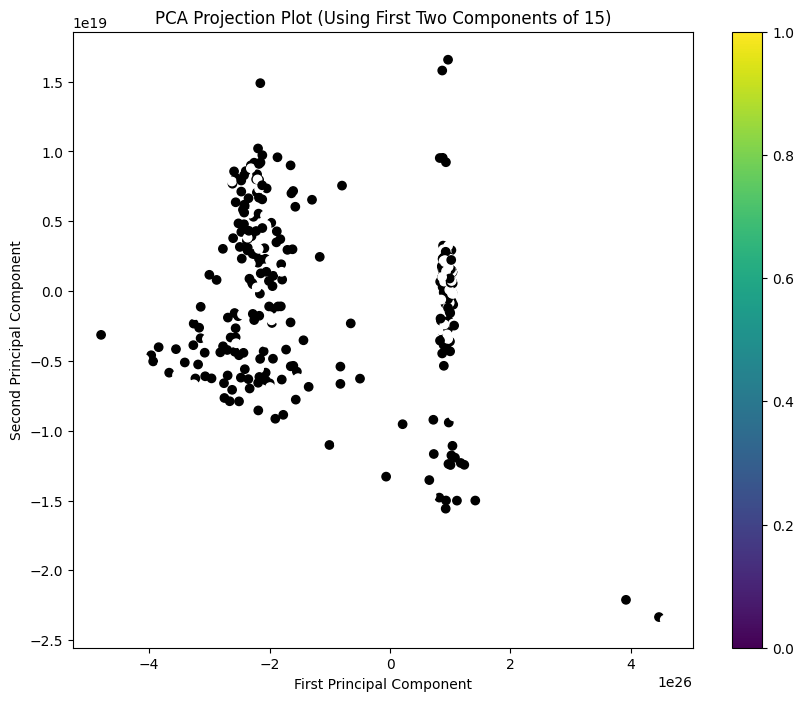

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Perform PCA with 15 components
pca = PCA(n_components=15)
X_pca_15 = pca.fit_transform(X_comb)  # Fit and transform on training data

# Explained Variance Ratio
print("PCA Explained Variance Ratio for 15 Components:")
print(pca.explained_variance_ratio_)

# Plotting the projection using the first two components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_15[:, 0], X_pca_15[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter)
plt.title('PCA Projection Plot (Using First Two Components of 15)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [ ]:
# Get the loadings (contribution of each feature to each principal component)
loadings = pd.DataFrame(pca.components_, columns=X_comb.columns, index=[f"PC{i+1}" for i in range(15)])

# Find the top contributing features for each principal component
top_features_per_pc = {}
for pc in loadings.index:
    top_features_per_pc[pc] = loadings.loc[pc].abs().nlargest(3).index.tolist()  # Top 3 features per PC

# Summarize the top contributing features
print("Top Contributing Features per Principal Component:")
for pc, features in top_features_per_pc.items():
    print(f"{pc}: {features}")

# Optional: Average contribution of features across all components
avg_contribution = loadings.abs().mean(axis=0).sort_values(ascending=False)

# Retained features across all PCs
retained_features = avg_contribution.index[:15].tolist()  # Top 15 most influential features
print("\nFinal Retained Features:")
print(retained_features)


Top Contributing Features per Principal Component:
PC1: ['time_of_day__variance', 'time_of_day__sum_values', 'time_of_day__standard_deviation']
PC2: ['time_of_day__sum_values', 'battery_voltage__root_mean_square', 'enmo__maximum']
PC3: ['X__standard_deviation', 'battery_voltage__mean', 'anglez__median']
PC4: ['light__standard_deviation', 'X__standard_deviation', 'anglez__median']
PC5: ['non-wear_flag__median', 'time_of_day__root_mean_square', 'time_of_day__minimum']
PC6: ['non-wear_flag__mean', 'X__variance', 'enmo__variance']
PC7: ['quarter__standard_deviation', 'weekday__standard_deviation', 'enmo__median']
PC8: ['non-wear_flag__absolute_maximum', 'Z__root_mean_square', 'non-wear_flag__median']
PC9: ['quarter__variance', 'light__median', 'quarter__root_mean_square']
PC10: ['light__sum_values', 'quarter__root_mean_square', 'light__median']
PC11: ['non-wear_flag__root_mean_square', 'light__variance', 'Y__root_mean_square']
PC12: ['enmo__median', 'quarter__standard_deviation', 'enmo__va

PCA dropped columns because:

>  columns were dropped primarily due to redundancy, low variance contribution, and the goal of dimensionality reduction.


> Highly correlated features, such as time_of_day__standard_deviation and time_of_day__variance, were consolidated, as PCA combines related features into principal components, removing redundancy. Features contributing little to the overall variance, like non-wear_flag__median or light__variance, were excluded due to their minimal influence on the principal components.

Dropped the columns of 'PCIAT' as told to do so in announcemnt

In [ ]:
# Filter out columns containing 'PCIAT'
retained_features = [col for col in retained_features if 'PCIAT' not in col]

# Print the updated retained features
print("Updated Retained Features (Excluding 'PCIAT'):")
print(retained_features)


Updated Retained Features (Excluding 'PCIAT'):
['non-wear_flag__median', 'light__standard_deviation', 'enmo__variance', 'X__standard_deviation', 'non-wear_flag__absolute_maximum', 'Z__root_mean_square', 'quarter__standard_deviation', 'non-wear_flag__mean', 'battery_voltage__mean', 'anglez__median', 'time_of_day__standard_deviation', 'time_of_day__root_mean_square', 'enmo__median', 'X__variance', 'quarter__root_mean_square']


In [ ]:
# Ensure that the columns in retained_features exist in the original DataFrame X
valid_features = [col for col in retained_features if col in X.columns]

# Create a new DataFrame with only the retained features
final_train_reduced = X[valid_features]

# Display the new DataFrame
print("New DataFrame with Retained Features:")
final_train_reduced

New DataFrame with Retained Features:


,non-wear_flag__median,light__standard_deviation,enmo__variance,X__standard_deviation,non-wear_flag__absolute_maximum,Z__root_mean_square,quarter__standard_deviation,non-wear_flag__mean,battery_voltage__mean,anglez__median,time_of_day__standard_deviation,time_of_day__root_mean_square,enmo__median,X__variance,quarter__root_mean_square
0,0.0,88.615250,0.005913,0.557440,1.0,0.504888,0.000000,0.031900,3850.230194,-1.322068,2.487233e+13,4.993626e+13,0.009721,0.310739,1.000000
1,0.0,112.229261,0.011247,0.579833,0.0,0.642822,0.000000,0.000000,3814.928156,13.942924,2.494077e+13,4.988846e+13,0.013202,0.336206,1.000000
2,0.0,14.966637,0.001862,0.386449,0.0,0.695009,0.488778,0.000000,3887.100289,49.510912,1.357323e+13,4.748502e+13,0.016336,0.149343,3.638320
3,0.0,303.785723,0.026763,0.542227,0.0,0.462680,0.000000,0.000000,3991.940898,-10.904899,1.661747e+13,5.097231e+13,0.038461,0.294010,4.000000
4,0.0,63.916590,0.014222,0.555293,1.0,0.598232,1.488966,0.048070,3839.499726,11.507783,2.511173e+13,5.006639e+13,0.016812,0.308351,2.755354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,1.0,9.616478,0.000204,0.288902,1.0,0.812103,0.398572,0.677008,3842.192257,-41.354321,2.504456e+13,5.005563e+13,0.002967,0.083464,3.822729
792,0.0,153.288449,0.013675,0.609502,0.0,0.474918,0.000000,0.000000,3846.456353,-9.817453,1.996868e+13,5.535058e+13,0.033013,0.371493,2.000000
793,0.0,445.544483,0.040851,0.377231,0.0,0.520600,0.300764,0.000000,4094.840696,3.262085,2.209490e+13,6.331963e+13,0.038708,0.142303,1.140931
794,0.0,79.202733,0.001450,0.547258,1.0,0.590685,0.256781,0.024586,3829.063021,-12.220540,2.479403e+13,5.001119e+13,0.008240,0.299491,3.937408


In [ ]:
final_train_reduced.describe()

,non-wear_flag__median,light__standard_deviation,enmo__variance,X__standard_deviation,non-wear_flag__absolute_maximum,Z__root_mean_square,quarter__standard_deviation,non-wear_flag__mean,battery_voltage__mean,anglez__median,time_of_day__standard_deviation,time_of_day__root_mean_square,enmo__median,X__variance,quarter__root_mean_square
count,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,7.960000e+02,7.960000e+02,796.000000,796.000000,796.000000
mean,0.202799,145.209583,0.012676,0.476047,0.648241,0.631184,0.178276,0.214481,3880.372289,-12.780105,2.268772e+13,5.127675e+13,0.013274,0.245092,2.388696
std,0.399644,125.953987,0.014544,0.135993,0.477819,0.139193,0.357963,0.292518,74.535838,30.092902,3.678078e+12,2.779153e+12,0.010997,0.110886,1.106936
min,0.000000,0.244579,0.000002,0.024780,0.000000,0.314564,0.000000,0.000000,3661.307897,-89.396248,6.972169e+12,3.889877e+13,0.000000,0.000614,1.000000
25%,0.000000,42.646283,0.002887,0.414134,0.000000,0.525479,0.000000,0.000000,3839.483760,-19.524040,1.894645e+13,4.990718e+13,0.004348,0.171507,1.067559
50%,0.000000,103.657306,0.008302,0.514484,1.000000,0.600033,0.000000,0.050680,3848.606942,-10.786225,2.491030e+13,5.005077e+13,0.010052,0.264694,2.039953
75%,0.000000,221.568030,0.017650,0.575175,1.000000,0.707868,0.239674,0.374073,3898.609904,-0.166988,2.500308e+13,5.168078e+13,0.020878,0.330827,3.266132
max,1.000000,712.099943,0.130782,0.705287,1.000000,1.048191,1.499980,0.985155,4150.338299,88.542992,3.137297e+13,6.919323e+13,0.052493,0.497430,4.000000


In [ ]:
# Check the columns in your DataFrame
print(final_train_reduced.columns)


Index(['non-wear_flag__median', 'light__standard_deviation',
       'X__standard_deviation', 'non-wear_flag__absolute_maximum',
       'Z__root_mean_square', 'quarter__standard_deviation',
       'non-wear_flag__mean', 'battery_voltage__mean', 'anglez__median',
       'time_of_day__standard_deviation', 'time_of_day__root_mean_square',
       'enmo__median', 'X__variance', 'quarter__root_mean_square', 'id'],
      dtype='object')


## Table 1

In [ ]:
import pandas as pd

# Grouping columns by statistical measure types (without enmo__variance, since it's missing)
statistical_features = {
    'Mean': ['non-wear_flag__mean', 'battery_voltage__mean'],
    'Median': ['non-wear_flag__median', 'anglez__median', 'enmo__median'],
    'Variance': ['X__variance'],
    'Standard Deviation': ['light__standard_deviation', 'X__standard_deviation', 'quarter__standard_deviation'],
    'Root Mean Square': ['Z__root_mean_square', 'time_of_day__root_mean_square']
}

# Initialize an empty DataFrame for the grouped table
grouped_table1 = pd.DataFrame()

# Loop through each feature group and calculate the mean for each group
for group, features in statistical_features.items():
    # Ensure all features in the group are present in the DataFrame
    existing_features = [f for f in features if f in final_train_reduced.columns]
    if existing_features:  # Only calculate if features exist
        grouped_table1[group] = final_train_reduced[existing_features].mean(axis=1)

grouped_table1


,Mean,Median,Variance,Standard Deviation,Root Mean Square
0,1925.131047,-0.437449,0.310739,29.724230,2.496813e+13
1,1907.464078,4.652042,0.336206,37.603031,2.494423e+13
2,1943.550144,-3.589963,0.149343,5.280621,2.374251e+13
3,1995.970449,-3.622146,0.294010,101.442650,2.548616e+13
4,1919.773898,3.841532,0.308351,21.986950,2.503319e+13
...,...,...,...,...,...
791,1921.434632,-13.450451,0.083464,3.434651,2.502781e+13
792,1923.228177,-3.261480,0.371493,51.299317,2.767529e+13
793,2047.420348,1.100264,0.142303,148.740826,3.165981e+13
794,1914.543803,-4.070767,0.299491,26.668924,2.500560e+13


**Mean Values:** The mean of the battery voltage (Mean) appears to stay within a range of 1900-2000, indicating that the power supply across the dataset remains fairly stable.

**Median Values:** The median values for non-wear_flag and anglez are generally close to zero, but there are both positive and negative shifts observed. This suggests that there are periods where the device is in active use or in non-wear states, causing variations in the data throughout the day.

**Variance:** The variance in metrics like X__variance and quarter__root_mean_square is relatively low, indicating that the data points for these measurements are tightly clustered around their mean.

**Standard Deviation and RMS:** The standard deviation, particularly for X__standard_deviation, shows noticeable variation, with certain rows exhibiting large fluctuations. This could be due to occasional bursts of activity or changes in the environment. Similarly, the Root Mean Square (RMS) values show higher peaks during specific instances.



## Table 2

In [ ]:
import pandas as pd

# Grouping columns by functional categories (removed enmo__variance because it's missing)
feature_groups = {
    'Energy Metrics': ['light__standard_deviation', 'X__standard_deviation'],  # Removed enmo__variance
    'Battery Info': ['battery_voltage__mean', 'non-wear_flag__mean'],
    'Time Metrics': ['time_of_day__standard_deviation', 'time_of_day__root_mean_square'],
    'Movement': ['non-wear_flag__median', 'enmo__median', 'quarter__root_mean_square'],
    'Angle Metrics': ['anglez__median', 'Z__root_mean_square']
}

# Create a new DataFrame to store the mean of each feature group
grouped_table2 = pd.DataFrame()

# Loop through each feature group and calculate the mean for each group, checking if columns exist
for group, features in feature_groups.items():
    # Check for existing columns in the feature group
    existing_features = [f for f in features if f in final_train_reduced.columns]
    if existing_features:  # Only calculate if features exist
        grouped_table2[group] = final_train_reduced[existing_features].mean(axis=1)

grouped_table2


,Energy Metrics,Battery Info,Time Metrics,Movement,Angle Metrics
0,44.586345,1925.131047,3.740429e+13,0.336574,-0.408590
1,56.404547,1907.464078,3.741462e+13,0.337734,7.292873
2,7.676543,1943.550144,3.052913e+13,1.218219,-5.045608
3,152.163975,1995.970449,3.379489e+13,1.346154,-5.221110
4,32.235942,1919.773898,3.758906e+13,0.924055,6.053007
...,...,...,...,...,...
791,4.952690,1921.434632,3.755009e+13,1.608565,-20.271109
792,76.948976,1923.228177,3.765963e+13,0.677671,-4.671268
793,222.960857,2047.420348,4.270726e+13,0.393213,1.891342
794,39.874995,1914.543803,3.740261e+13,1.315216,-5.814927


**Energy Metrics:** The Energy Metrics show significant variability, ranging from very low values to peaks over 200, indicating fluctuating energy consumption or sensor activity. This suggests the device's energy usage varies depending on its state or environment.

**Battery Info:** The Battery Info remains stable, fluctuating between 1900 and 2050, reflecting a consistent power supply. This stability indicates the battery is operating normally across the dataset.

**Time Metrics:** Time Metrics exhibit minimal variation, indicating predictable temporal changes. These steady values suggest the time-related measurements remain consistent throughout the data.

**Movement:** Movement shows wide variability, with values ranging from 0.3 to over 1, reflecting fluctuating activity levels. This variability likely corresponds to changes in physical movement or sensor-triggered events.

**Angle Metrics**: Angle Metrics show both positive and negative fluctuations, ranging from -20 to 7, indicating shifts in device orientation. These variations suggest the device experiences significant changes in its positioning or movement.

## PLOT 4 : Box Plot

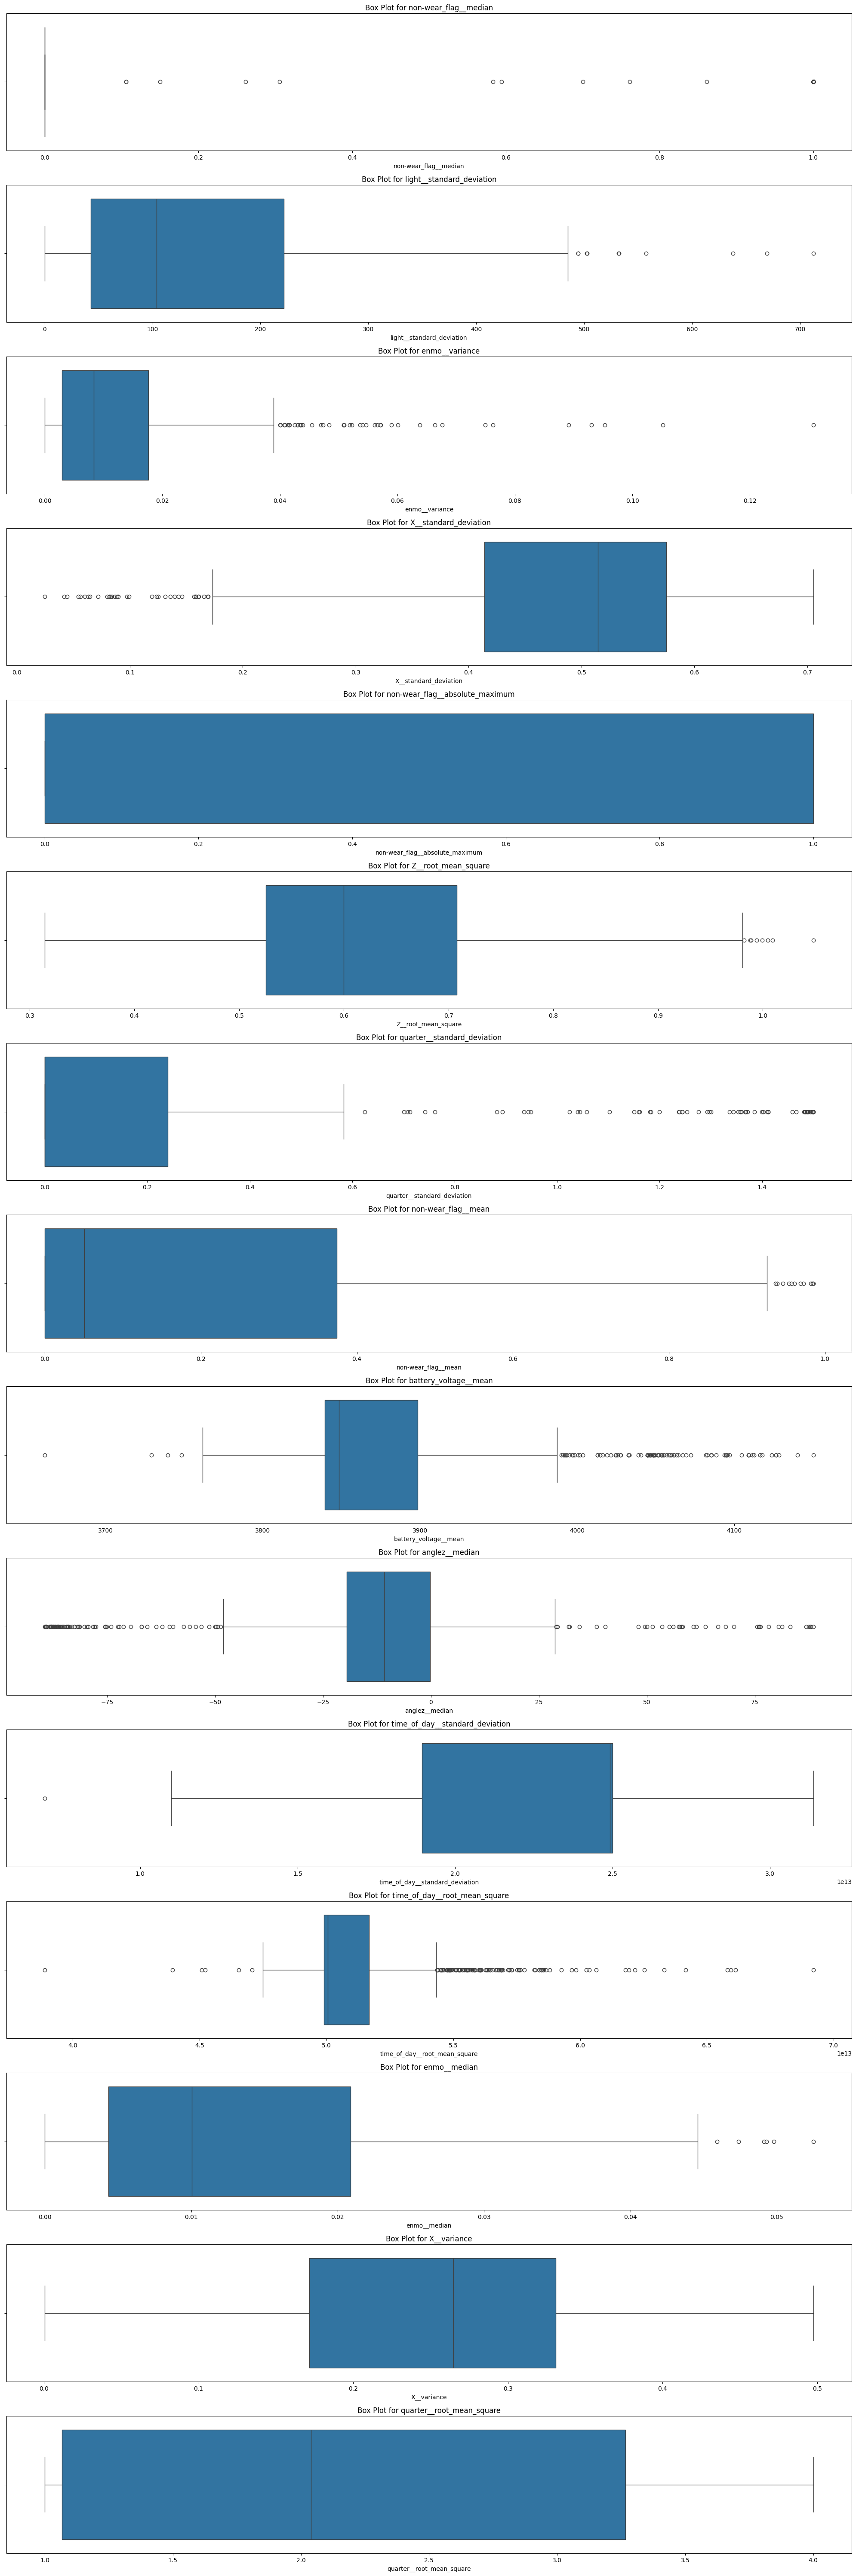

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for each valid feature
plt.figure(figsize=(20, len(valid_features) * 4))  # Adjust figure size based on the number of features

for i, col in enumerate(valid_features, 1):
    plt.subplot(len(valid_features), 1, i)  # Create a subplot for each feature
    sns.boxplot(x=final_train_reduced[col])
    plt.title(f'Box Plot for {col}')
    plt.tight_layout()

plt.show()


* Following box plots are used to assess the distibution of data and check outliers visually.

* For instance, the feature battery_voltage__mean exhibits almost no variation, with the majority of its values clustered around a single point. Such features were dropped as they contribute little to the predictive power of the model.
*  the feature light__median showed extreme outliers, with values exceeding the typical operational range. To mitigate the impact of these anomalies, outlier values were replaced with the median value of the feature.

In [ ]:
# Identify the feature
feature = 'anglez__median'

# Calculate the median of the feature
median_value = final_train_reduced[feature].median()

# Define the threshold for outliers (e.g., 1.5 times the interquartile range)
Q1 = final_train_reduced[feature].quantile(0.25)  # First quartile
Q3 = final_train_reduced[feature].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median value
final_train_reduced[feature] = final_train_reduced[feature].apply(
    lambda x: median_value if x < lower_bound or x > upper_bound else x
)

# Verify the replacement
print(f"Outliers in '{feature}' replaced with median value.")


Outliers in 'anglez__median' replaced with median value.


In [ ]:
# Drop the step__minimum feature
if 'enmo__variance' in final_train_reduced.columns:
    final_train_reduced = final_train_reduced.drop(columns=['enmo__variance'])
    print("Feature 'enmo__variance' has been dropped.")
else:
    print("Feature 'enmo__variance' not found in the DataFrame.")


Feature 'enmo__variance' has been dropped.


In [ ]:
final_train_reduced

,non-wear_flag__median,light__standard_deviation,X__standard_deviation,non-wear_flag__absolute_maximum,Z__root_mean_square,quarter__standard_deviation,non-wear_flag__mean,battery_voltage__mean,anglez__median,time_of_day__standard_deviation,time_of_day__root_mean_square,enmo__median,X__variance,quarter__root_mean_square
0,0.0,88.615250,0.557440,1.0,0.504888,0.000000,0.031900,3850.230194,-1.322068,2.487233e+13,4.993626e+13,0.009721,0.310739,1.000000
1,0.0,112.229261,0.579833,0.0,0.642822,0.000000,0.000000,3814.928156,13.942924,2.494077e+13,4.988846e+13,0.013202,0.336206,1.000000
2,0.0,14.966637,0.386449,0.0,0.695009,0.488778,0.000000,3887.100289,-10.786225,1.357323e+13,4.748502e+13,0.016336,0.149343,3.638320
3,0.0,303.785723,0.542227,0.0,0.462680,0.000000,0.000000,3991.940898,-10.904899,1.661747e+13,5.097231e+13,0.038461,0.294010,4.000000
4,0.0,63.916590,0.555293,1.0,0.598232,1.488966,0.048070,3839.499726,11.507783,2.511173e+13,5.006639e+13,0.016812,0.308351,2.755354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,1.0,9.616478,0.288902,1.0,0.812103,0.398572,0.677008,3842.192257,-41.354321,2.504456e+13,5.005563e+13,0.002967,0.083464,3.822729
792,0.0,153.288449,0.609502,0.0,0.474918,0.000000,0.000000,3846.456353,-9.817453,1.996868e+13,5.535058e+13,0.033013,0.371493,2.000000
793,0.0,445.544483,0.377231,0.0,0.520600,0.300764,0.000000,4094.840696,3.262085,2.209490e+13,6.331963e+13,0.038708,0.142303,1.140931
794,0.0,79.202733,0.547258,1.0,0.590685,0.256781,0.024586,3829.063021,-12.220540,2.479403e+13,5.001119e+13,0.008240,0.299491,3.937408


## Table 3

In [ ]:
# Select only numeric columns
numeric_columns = final_train_reduced.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_columns.corr()

# Print the correlation matrix
print(corr_matrix)


                                 non-wear_flag__median  \
non-wear_flag__median                         1.000000   
light__standard_deviation                    -0.356950   
X__standard_deviation                        -0.777855   
non-wear_flag__absolute_maximum               0.374041   
Z__root_mean_square                           0.655036   
quarter__standard_deviation                  -0.010765   
non-wear_flag__mean                           0.910725   
battery_voltage__mean                        -0.235235   
anglez__median                               -0.041906   
time_of_day__standard_deviation               0.320220   
time_of_day__root_mean_square                -0.235199   
enmo__median                                 -0.410955   
X__variance                                  -0.733111   
quarter__root_mean_square                    -0.004351   

                                 light__standard_deviation  \
non-wear_flag__median                            -0.356950   
light

Table gives the corelation of dataframe

## PLOT 5 : Pair Plot

In [ ]:
final_train_reduced.columns

Index(['non-wear_flag__median', 'light__standard_deviation',
       'X__standard_deviation', 'non-wear_flag__absolute_maximum',
       'Z__root_mean_square', 'quarter__standard_deviation',
       'non-wear_flag__mean', 'battery_voltage__mean', 'anglez__median',
       'time_of_day__standard_deviation', 'time_of_day__root_mean_square',
       'enmo__median', 'X__variance', 'quarter__root_mean_square'],
      dtype='object')

Randomly selected columns: ['anglez__median', 'time_of_day__standard_deviation', 'non-wear_flag__median', 'X__variance', 'non-wear_flag__mean', 'sii']


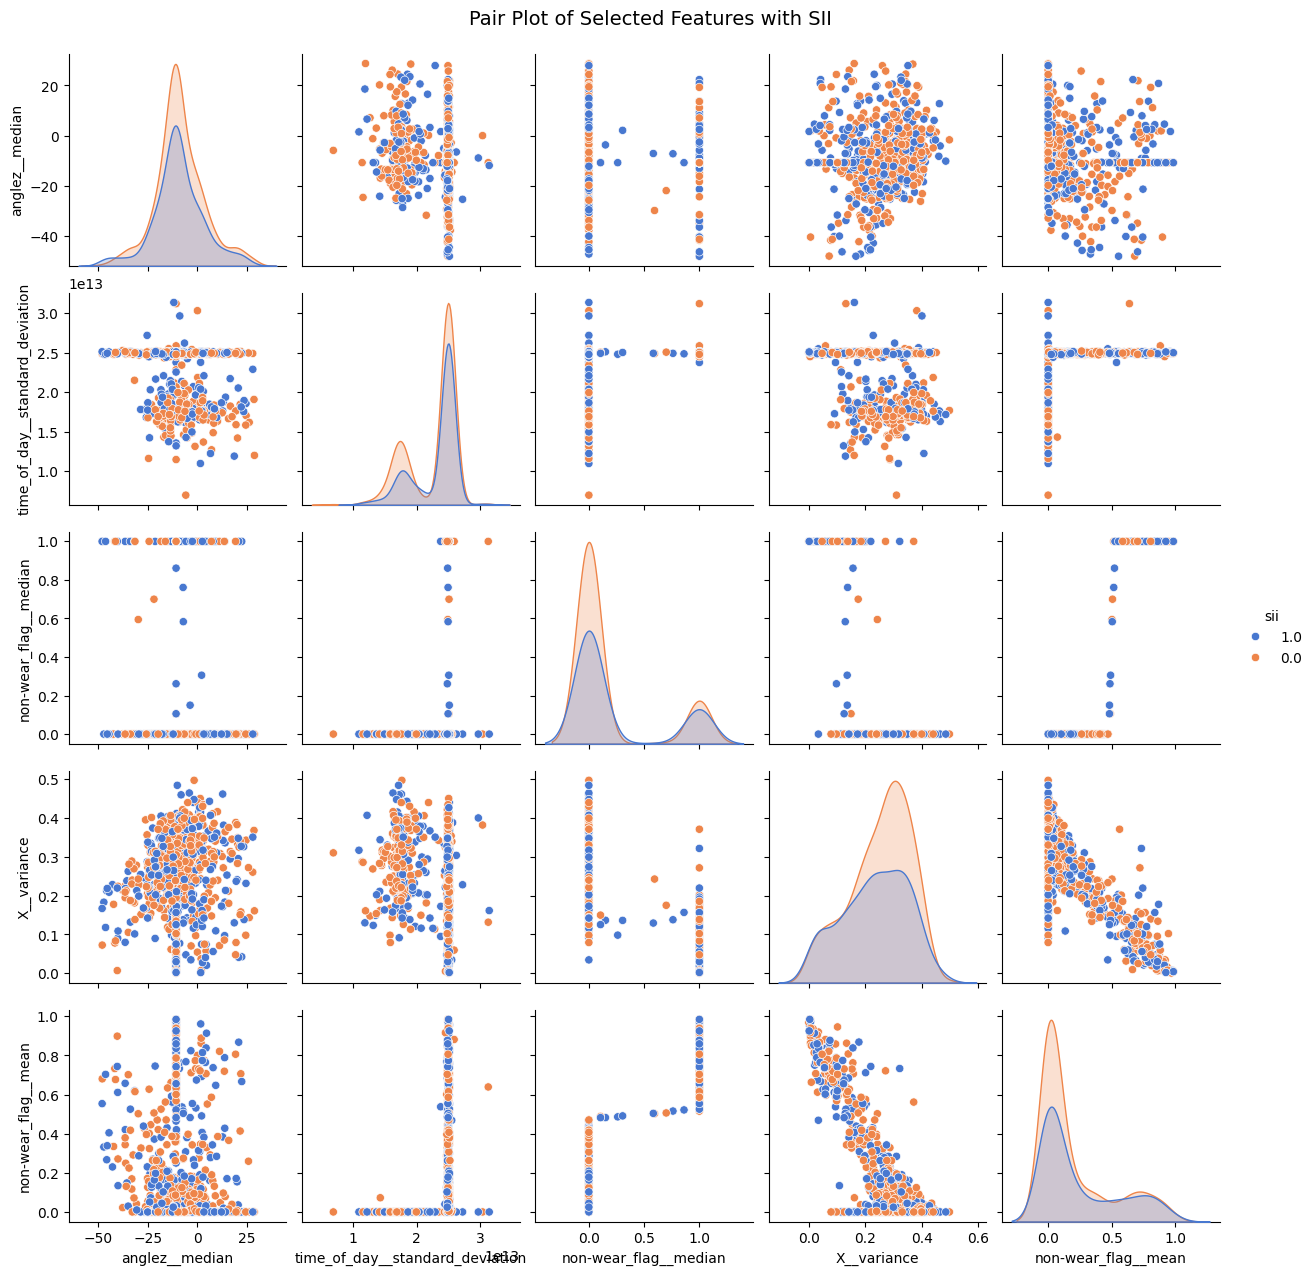

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Combine X_new and y into a single DataFrame for plotting
temp_data = final_train_reduced.copy()
temp_data['sii'] = y  # Add the target variable from y

# Randomly select 5 columns from the list
selected_columns = random.sample(list(final_train_reduced.columns), 5)

# Add 'sii' to the selected columns
selected_columns.append('sii')

print(f"Randomly selected columns: {selected_columns}")

# # Select relevant columns for the pair plot
# selected_columns = [
#     'anglez__standard_deviation',
#     'light__variance',
#     'Z__variance',
#     'Y__sum_values',
#     'battery_voltage__mean',
#     'time_of_day__variance',
#     'sii'
# ]
temp_data = temp_data[selected_columns].dropna()

# Create the pair plot with hue based on 'sii'
sns.pairplot(temp_data, hue='sii', diag_kind='kde', palette='muted', height=2.5)

# Add title
plt.suptitle('Pair Plot of Selected Features with SII', y=1.02, fontsize=14)
plt.show()


In [ ]:
# Convert IDs to a list
train_ids = y_train['id'].to_list()
test_ids = y_test['id'].to_list()

In [ ]:
print('Null rows in Training data: ',final_train_reduced.isna().sum().sum())

Null rows in Training data:  0


In [ ]:
# Get the columns from final_train_reduced
final_train_columns = final_train_reduced.columns

# Select only those columns from final_test that are also in final_train_columns
final_test_reduced = final_test[final_train_columns]


In [ ]:
print('Null rows in Testing data: ',final_test_reduced.isna().sum().sum())

Null rows in Testing data:  0


# Joining with Demographic Data

In [ ]:
train_dframe=pd.read_csv('/content/drive/MyDrive/Python_Group_Project/train.csv')

In [ ]:
train_dframe

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [ ]:
import os
import pandas as pd

# Step 1: List folder IDs by removing 'id=' prefix
paraquet_series_path = '/content/drive/MyDrive/Python_Group_Project/series_train.parquet'
paraquet_ids = {folder_name.split('id=')[-1] for folder_name in os.listdir(paraquet_series_path)}

# Step 2: Extract IDs from dataset directly
dataset_ids = pd.Series(train_dframe['id'].astype(str))

# Step 3: Filter dataset directly based on common IDs
common_ids = dataset_ids[dataset_ids.isin(paraquet_ids)]
train_dframe2 = train_dframe[train_dframe['id'].isin(common_ids)]


In [ ]:
train_dframe2

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0
20,00f332d1,Winter,14,0,Spring,68.0,Spring,17.168636,66.50,108.0,...,2.0,2.0,2.0,47.0,Spring,30.0,43.0,Winter,2.0,1.0
22,01085eb3,Fall,12,0,Winter,58.0,Fall,34.187282,60.50,178.0,...,1.0,1.0,0.0,30.0,Fall,53.0,73.0,Fall,0.0,0.0
25,012cadd8,Spring,9,0,Winter,60.0,Fall,17.089151,53.20,68.8,...,0.0,0.0,0.0,9.0,Summer,27.0,40.0,Spring,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,fe9c71d8,Winter,9,0,Spring,80.0,Winter,15.891137,56.75,72.8,...,1.0,1.0,1.0,29.0,Winter,33.0,47.0,Winter,0.0,0.0
3947,fecc07d6,Fall,7,0,Spring,85.0,Winter,15.986589,49.00,54.6,...,0.0,0.0,0.0,14.0,Winter,34.0,49.0,Fall,0.0,0.0
3951,ff18b749,Spring,7,0,NaN,NaN,Summer,14.768842,47.50,47.4,...,0.0,0.0,0.0,0.0,Summer,62.0,85.0,Spring,0.0,0.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.00,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0


## Approach-1: dropping the PCIAT columns

In [ ]:
# Remove columns containing 'PCIAT'
demo_df_1 = train_dframe2.loc[:, ~train_dframe2.columns.str.contains('PCIAT')]

# Print the updated dataframe
demo_df_1


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,...,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,...,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0,1.0
20,00f332d1,Winter,14,0,Spring,68.0,Spring,17.168636,66.50,108.0,...,NaN,NaN,Winter,2.320,Spring,30.0,43.0,Winter,2.0,1.0
22,01085eb3,Fall,12,0,Winter,58.0,Fall,34.187282,60.50,178.0,...,NaN,NaN,Fall,1.280,Fall,53.0,73.0,Fall,0.0,0.0
25,012cadd8,Spring,9,0,Winter,60.0,Fall,17.089151,53.20,68.8,...,NaN,NaN,Summer,2.510,Summer,27.0,40.0,Spring,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,fe9c71d8,Winter,9,0,Spring,80.0,Winter,15.891137,56.75,72.8,...,NaN,NaN,Winter,2.910,Winter,33.0,47.0,Winter,0.0,0.0
3947,fecc07d6,Fall,7,0,Spring,85.0,Winter,15.986589,49.00,54.6,...,NaN,NaN,NaN,NaN,Winter,34.0,49.0,Fall,0.0,0.0
3951,ff18b749,Spring,7,0,NaN,NaN,Summer,14.768842,47.50,47.4,...,NaN,NaN,NaN,NaN,Summer,62.0,85.0,Spring,0.0,0.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.00,109.8,...,NaN,NaN,Winter,2.729,Winter,56.0,77.0,Fall,0.0,1.0


## Approach 2: Correlation Based

In [ ]:
# Drop non-numeric columns (like 'id' and any categorical columns) before calculating the correlation matrix
demo_df_1_numeric = demo_df_1.select_dtypes(include=['number'])  # Select only numeric columns

# Now calculate the correlation matrix
correlation_matrix = demo_df_1_numeric.corr()

threshold = 0.9  # Set a threshold for correlation

# Find highly correlated features
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
highly_correlated = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop highly correlated features
demo_df_2 = demo_df_1.drop(columns=highly_correlated)

# Print dropped columns
print(f"Dropped Columns (Approach 2): {highly_correlated}")



Dropped Columns (Approach 2): ['Physical-Waist_Circumference', 'Fitness_Endurance-Time_Mins', 'FGC-FGC_GSD', 'FGC-FGC_SRR', 'BIA-BIA_BMI', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_Fat', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'SDS-SDS_Total_T']


## Approach 3:  Missing Data Analysis

In [ ]:
# Approach 4: Dropping Columns with Many Missing Values
missing_percentage = demo_df_2.isna().mean() * 100
columns_to_drop_missing = missing_percentage[missing_percentage > 30].index.tolist()

# Drop these columns
demo_df_3 = demo_df_2.drop(columns=columns_to_drop_missing)

# Print dropped columns
print(f"Dropped Columns (Approach 3): {columns_to_drop_missing}")


Dropped Columns (Approach 3): ['Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL_Zone', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total', 'PAQ_C-Season', 'PAQ_C-PAQ_C_Total']


In [ ]:
demo_df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 3 to 3958
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      996 non-null    object 
 1   Basic_Demos-Enroll_Season               996 non-null    object 
 2   Basic_Demos-Age                         996 non-null    int64  
 3   Basic_Demos-Sex                         996 non-null    int64  
 4   CGAS-Season                             954 non-null    object 
 5   CGAS-CGAS_Score                         954 non-null    float64
 6   Physical-Season                         992 non-null    object 
 7   Physical-BMI                            985 non-null    float64
 8   Physical-Height                         988 non-null    float64
 9   Physical-Weight                         986 non-null    float64
 10  Physical-Diastolic_BP                   979 non-null    float64
 1

## Approach 4: Variance Inspection

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Step 1: Define X (features) and y (target)
X = demo_df_3.drop(columns=['sii'])  # Features
y = demo_df_3['sii']  # Target variable

# Step 2: Separate numeric and categorical columns
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Step 3: Handle missing values for numeric columns (Impute with median)
numeric_imputer = SimpleImputer(strategy='median')
X[numeric_columns] = numeric_imputer.fit_transform(X[numeric_columns])

# Step 4: Encode categorical variables (Label Encoding)
label_encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column].astype(str))

# Step 5: Inspect the variance of numeric columns before applying the variance threshold
print(f"Variance of numeric columns before thresholding:\n{X[numeric_columns].var()}")

# Step 6: Apply Variance Threshold with a higher threshold (e.g., 0.1 or 0.5)
variance_threshold = VarianceThreshold(threshold=0.1)  # You can try higher thresholds like 0.1 or 0.5
X_variance_selected = variance_threshold.fit_transform(X)

# Step 7: Get the columns that are kept after variance filtering
selected_columns = X.columns[variance_threshold.get_support()]

# Step 8: If you want to keep the top 10 columns, sort the selected columns by variance and select the top 10
column_variances = X[selected_columns].var()  # Get variance of selected columns
top_10_columns = column_variances.sort_values(ascending=False).head(10).index  # Get top 10 columns based on variance

# Step 9: Create a final DataFrame with top 10 columns + target
demo_df_4_selected = demo_df_3[top_10_columns.tolist() + ['sii']]  # Keep the target variable

# Print the final dataframe with columns selected based on variance threshold
print(f"Top 10 Columns selected based on variance thresholding:\n{top_10_columns}")
print(f"Remaining columns in the final dataset: {demo_df_4_selected.columns}")


Variance of numeric columns before thresholding:
Basic_Demos-Age                               11.988314
Basic_Demos-Sex                                0.226630
CGAS-CGAS_Score                              127.456790
Physical-BMI                                  25.155562
Physical-Height                               55.266259
Physical-Weight                             1871.181402
Physical-Diastolic_BP                        215.503748
Physical-HeartRate                           188.545426
Physical-Systolic_BP                         308.499642
FGC-FGC_CU                                    96.748461
FGC-FGC_TL                                     5.951429
BIA-BIA_Activity_Level_num                     0.750374
BIA-BIA_BMC                                    3.126595
BIA-BIA_BMR                                72349.855849
BIA-BIA_DEE                               305373.752240
BIA-BIA_FFMI                                  16.284517
BIA-BIA_FMI                                   23.400539

In [ ]:
demo_df_4_selected

,BIA-BIA_DEE,id,BIA-BIA_BMR,Physical-Weight,Physical-Systolic_BP,Physical-Diastolic_BP,Physical-HeartRate,CGAS-CGAS_Score,FGC-FGC_CU,SDS-SDS_Total_Raw,sii
3,1923.44,00115b9f,1131.43,81.6,117.0,60.0,97.0,71.0,18.0,31.0,1.0
5,1996.45,001f3379,1330.97,112.2,102.0,60.0,73.0,50.0,12.0,40.0,1.0
20,2969.90,00f332d1,1414.24,108.0,129.0,60.0,71.0,68.0,16.0,30.0,1.0
22,2016.56,01085eb3,1551.20,178.0,119.0,67.0,81.0,58.0,8.0,53.0,0.0
25,NaN,012cadd8,NaN,68.8,123.0,62.0,88.0,60.0,NaN,27.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3945,2345.40,fe9c71d8,1116.86,72.8,78.0,44.0,65.0,80.0,8.0,33.0,0.0
3947,1603.74,fecc07d6,1002.34,54.6,113.0,59.0,80.0,85.0,4.0,34.0,0.0
3951,NaN,ff18b749,NaN,47.4,98.0,58.0,99.0,NaN,NaN,62.0,0.0
3957,2005.99,ffcd4dbd,1253.74,109.8,116.0,79.0,99.0,68.0,15.0,56.0,1.0


## Table 4

In [ ]:
# Group by 'Physical-Systolic_BP' and count occurrences of each value
table3 = demo_df_4_selected.groupby('Physical-Systolic_BP').size().reset_index(name='Count')

# Sort by count in descending order and get the top 5
top_5_table3 = table3.sort_values(by='Count', ascending=False).head(5)

# Display the result
top_5_table3


,Physical-Systolic_BP,Count
29,110.0,41
30,111.0,36
31,112.0,34
34,115.0,34
26,107.0,33


The most common systolic blood pressure values in the dataset are clustered between 107 and 115, with the top five values showing counts from 33 to 41. This suggests that most individuals have systolic blood pressure in this range, indicating relatively normal or healthy levels.

## Table 5

In [ ]:
numeric_columns = demo_df_4_selected.select_dtypes(include=['number']).columns
table4 = demo_df_4_selected[numeric_columns].groupby('sii').mean()
table4


,BIA-BIA_DEE,BIA-BIA_BMR,Physical-Weight,Physical-Systolic_BP,Physical-Diastolic_BP,Physical-HeartRate,CGAS-CGAS_Score,FGC-FGC_CU,SDS-SDS_Total_Raw
sii,,,,,,,,,
0.0,1870.326205,1136.976766,80.391304,115.504378,69.029772,81.926186,64.971530,8.925234,39.428030
1.0,2113.886596,1251.304872,100.346970,120.977186,71.973384,82.363636,64.083004,15.465116,42.119342
2.0,2314.596311,1362.834563,112.404380,121.222222,70.770370,81.801471,62.534351,15.021978,44.136752
3.0,2908.033333,1627.740000,149.820000,124.600000,70.700000,77.400000,68.125000,28.714286,47.500000


>  As the sii value increases, there is a noticeable upward trend in the BIA-BIA_DEE, BIA-BIA_BMR, and Physical-Weight metrics.
from above data individuals with higher sii values (>=1) tend to have higher BIA measurements and body mass metrics.


> The heart rate remains constant, showing no major correlation with sii.



# Final Dataframe by joining Demographic and MinFC

In [ ]:
print(demo_df_4_selected.shape)

(996, 11)


In [ ]:
demo_df_4_selected.columns

Index(['BIA-BIA_DEE', 'id', 'BIA-BIA_BMR', 'Physical-Weight',
       'Physical-Systolic_BP', 'Physical-Diastolic_BP', 'Physical-HeartRate',
       'CGAS-CGAS_Score', 'FGC-FGC_CU', 'SDS-SDS_Total_Raw', 'sii'],
      dtype='object')

In [ ]:

print(final_train_reduced.shape)
print(final_test_reduced.shape)

(796, 14)
(200, 14)


In [ ]:
final_train_reduced.columns

Index(['non-wear_flag__median', 'light__standard_deviation',
       'X__standard_deviation', 'non-wear_flag__absolute_maximum',
       'Z__root_mean_square', 'quarter__standard_deviation',
       'non-wear_flag__mean', 'battery_voltage__mean', 'anglez__median',
       'time_of_day__standard_deviation', 'time_of_day__root_mean_square',
       'enmo__median', 'X__variance', 'quarter__root_mean_square'],
      dtype='object')

In [ ]:
# Step 1: Assign 'id' column from original dataframes to reduced dataframes
final_train_reduced['id'] = final_train['id']
final_test_reduced['id'] = final_test['id']

# Step 2: Merge the train and test reduced dataframes with the demographic data
final_train_combined = final_train_reduced.merge(
    demo_df_4_selected,
    on='id',
    how='inner'
)

final_test_combined = final_test_reduced.merge(
    demo_df_4_selected,
    on='id',
    how='inner'
)

# Step 3: Check the shapes to confirm the join
print(f"Final Train Shape: {final_train_combined.shape}")
print(f"Final Test Shape: {final_test_combined.shape}")



Final Train Shape: (796, 25)
Final Test Shape: (200, 25)


In [ ]:

# Step 4: Display a few rows for verification
print("Final Train Combined Head:")
print(final_train_combined.head())

print("Final Test Combined Head:")
print(final_test_combined.head())

Final Train Combined Head:
   non-wear_flag__median  light__standard_deviation  X__standard_deviation  \
0                    0.0                  88.615250               0.557440   
1                    0.0                 112.229261               0.579833   
2                    0.0                  14.966637               0.386449   
3                    0.0                 303.785723               0.542227   
4                    0.0                  63.916590               0.555293   

   non-wear_flag__absolute_maximum  Z__root_mean_square  \
0                              1.0             0.504888   
1                              0.0             0.642822   
2                              0.0             0.695009   
3                              0.0             0.462680   
4                              1.0             0.598232   

   quarter__standard_deviation  non-wear_flag__mean  battery_voltage__mean  \
0                     0.000000              0.03190            3850.230

In [ ]:
print('Null rows in Training data: ',final_train_combined.isna().sum().sum())
print('Null rows in Testing data: ',final_test_combined.isna().sum().sum())
print('Shape of Training data: ',final_train_combined.shape)
print('Shape of Testing data: ',final_test_combined.shape)

Null rows in Training data:  811
Null rows in Testing data:  208
Shape of Training data:  (796, 25)
Shape of Testing data:  (200, 25)


In [ ]:
# Count the number of null values per column
missing_values = final_train_combined.isna().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])


BIA-BIA_DEE              203
BIA-BIA_BMR              203
Physical-Weight            9
Physical-Systolic_BP      16
Physical-Diastolic_BP     16
Physical-HeartRate        15
CGAS-CGAS_Score           29
FGC-FGC_CU               241
SDS-SDS_Total_Raw         79
dtype: int64


Imputing train columns with mean, and mode

In [ ]:
# Impute numerical columns
final_train_combined['BIA-BIA_DEE'] = final_train_combined['BIA-BIA_DEE'].fillna(final_train_combined['BIA-BIA_DEE'].mean())
final_train_combined['BIA-BIA_BMR'] = final_train_combined['BIA-BIA_BMR'].fillna(final_train_combined['BIA-BIA_BMR'].mean())
final_train_combined['Physical-Weight'] = final_train_combined['Physical-Weight'].fillna(final_train_combined['Physical-Weight'].mean())
final_train_combined['Physical-Systolic_BP'] = final_train_combined['Physical-Systolic_BP'].fillna(final_train_combined['Physical-Systolic_BP'].mean())
final_train_combined['Physical-Diastolic_BP'] = final_train_combined['Physical-Diastolic_BP'].fillna(final_train_combined['Physical-Diastolic_BP'].mean())
final_train_combined['Physical-HeartRate'] = final_train_combined['Physical-HeartRate'].fillna(final_train_combined['Physical-HeartRate'].mean())
final_train_combined['CGAS-CGAS_Score'] = final_train_combined['CGAS-CGAS_Score'].fillna(final_train_combined['CGAS-CGAS_Score'].mean())
final_train_combined['SDS-SDS_Total_Raw'] = final_train_combined['SDS-SDS_Total_Raw'].fillna(final_train_combined['SDS-SDS_Total_Raw'].mean())

# Impute categorical columns
final_train_combined['FGC-FGC_CU'] = final_train_combined['FGC-FGC_CU'].fillna(final_train_combined['FGC-FGC_CU'].mode()[0])

# Check if there are any missing values left
print(final_train_combined.isna().sum())


non-wear_flag__median              0
light__standard_deviation          0
X__standard_deviation              0
non-wear_flag__absolute_maximum    0
Z__root_mean_square                0
quarter__standard_deviation        0
non-wear_flag__mean                0
battery_voltage__mean              0
anglez__median                     0
time_of_day__standard_deviation    0
time_of_day__root_mean_square      0
enmo__median                       0
X__variance                        0
quarter__root_mean_square          0
id                                 0
BIA-BIA_DEE                        0
BIA-BIA_BMR                        0
Physical-Weight                    0
Physical-Systolic_BP               0
Physical-Diastolic_BP              0
Physical-HeartRate                 0
CGAS-CGAS_Score                    0
FGC-FGC_CU                         0
SDS-SDS_Total_Raw                  0
sii                                0
dtype: int64


In [ ]:
# Count the number of null values per column
missing_values_test = final_test_combined.isna().sum()

# Display columns with missing values
print(missing_values_test[missing_values_test > 0])

BIA-BIA_DEE              56
BIA-BIA_BMR              56
Physical-Weight           1
Physical-Systolic_BP      1
Physical-Diastolic_BP     1
Physical-HeartRate        2
CGAS-CGAS_Score          13
FGC-FGC_CU               57
SDS-SDS_Total_Raw        21
dtype: int64


Imputing test columns with mean, and mode

In [ ]:
# Impute with mean for the numerical columns
final_test_combined['BIA-BIA_DEE'] = final_test_combined['BIA-BIA_DEE'].fillna(final_test_combined['BIA-BIA_DEE'].mean())  # or .median() if skewed
final_test_combined['BIA-BIA_BMR'] = final_test_combined['BIA-BIA_BMR'].fillna(final_test_combined['BIA-BIA_BMR'].mean())  # or .median() if skewed
final_test_combined['Physical-Weight'] = final_test_combined['Physical-Weight'].fillna(final_test_combined['Physical-Weight'].mean())  # or .median()
final_test_combined['Physical-Systolic_BP'] = final_test_combined['Physical-Systolic_BP'].fillna(final_test_combined['Physical-Systolic_BP'].mean())  # or .median()
final_test_combined['Physical-Diastolic_BP'] = final_test_combined['Physical-Diastolic_BP'].fillna(final_test_combined['Physical-Diastolic_BP'].mean())  # or .median()
final_test_combined['Physical-HeartRate'] = final_test_combined['Physical-HeartRate'].fillna(final_test_combined['Physical-HeartRate'].mean())  # or .median()
final_test_combined['CGAS-CGAS_Score'] = final_test_combined['CGAS-CGAS_Score'].fillna(final_test_combined['CGAS-CGAS_Score'].mean())  # or .median()
final_test_combined['SDS-SDS_Total_Raw'] = final_test_combined['SDS-SDS_Total_Raw'].fillna(final_test_combined['SDS-SDS_Total_Raw'].mean())  # or .median()

# For categorical columns, use the mode for imputation
final_test_combined['FGC-FGC_CU'] = final_test_combined['FGC-FGC_CU'].fillna(final_test_combined['FGC-FGC_CU'].mode()[0])  # Mode imputation


In [ ]:
# Check if there are any missing values left
print(final_test_combined.isna().sum())

non-wear_flag__median              0
light__standard_deviation          0
X__standard_deviation              0
non-wear_flag__absolute_maximum    0
Z__root_mean_square                0
quarter__standard_deviation        0
non-wear_flag__mean                0
battery_voltage__mean              0
anglez__median                     0
time_of_day__standard_deviation    0
time_of_day__root_mean_square      0
enmo__median                       0
X__variance                        0
quarter__root_mean_square          0
id                                 0
BIA-BIA_DEE                        0
BIA-BIA_BMR                        0
Physical-Weight                    0
Physical-Systolic_BP               0
Physical-Diastolic_BP              0
Physical-HeartRate                 0
CGAS-CGAS_Score                    0
FGC-FGC_CU                         0
SDS-SDS_Total_Raw                  0
sii                                0
dtype: int64


Checking the Null values in train and test

In [ ]:
print('Null rows in Training data: ',final_train_combined.isna().sum().sum())
print('Null rows in Testing data: ',final_test_combined.isna().sum().sum())
print('Shape of Training data: ',final_train_combined.shape)
print('Shape of Testing data: ',final_test_combined.shape)

Null rows in Training data:  0
Null rows in Testing data:  0
Shape of Training data:  (796, 25)
Shape of Testing data:  (200, 25)


In [ ]:
# Numerical columns
numerical_cols_train = final_train_combined.select_dtypes(include=['number']).columns
numerical_cols_test = final_test_combined.select_dtypes(include=['number']).columns

print("Numerical columns in final_train_combined:")
print(numerical_cols_train)
print("\nNumerical columns in final_test_combined:")
print(numerical_cols_test)

# Object (categorical) columns
object_cols_train = final_train_combined.select_dtypes(include=['object']).columns
object_cols_test = final_test_combined.select_dtypes(include=['object']).columns

print("\nObject columns in final_train_combined:")
print(object_cols_train)
print("\nObject columns in final_test_combined:")
print(object_cols_test)


Numerical columns in final_train_combined:
Index(['non-wear_flag__median', 'light__standard_deviation',
       'X__standard_deviation', 'non-wear_flag__absolute_maximum',
       'Z__root_mean_square', 'quarter__standard_deviation',
       'non-wear_flag__mean', 'battery_voltage__mean', 'anglez__median',
       'time_of_day__standard_deviation', 'time_of_day__root_mean_square',
       'enmo__median', 'X__variance', 'quarter__root_mean_square',
       'BIA-BIA_DEE', 'BIA-BIA_BMR', 'Physical-Weight', 'Physical-Systolic_BP',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'CGAS-CGAS_Score',
       'FGC-FGC_CU', 'SDS-SDS_Total_Raw', 'sii'],
      dtype='object')

Numerical columns in final_test_combined:
Index(['non-wear_flag__median', 'light__standard_deviation',
       'X__standard_deviation', 'non-wear_flag__absolute_maximum',
       'Z__root_mean_square', 'quarter__standard_deviation',
       'non-wear_flag__mean', 'battery_voltage__mean', 'anglez__median',
       'time_of_day__st

In [ ]:
final_train_combined['sii'].value_counts()

,count
sii,
0.0,463
1.0,210
2.0,115
3.0,8


In [ ]:

# Recategorize 'sii' to 0.0 and 1.0
final_train_combined['sii'] = final_train_combined['sii'].apply(lambda x: 0.0 if x == 0.0 else 1.0)

# Check the value counts to verify the recoding
print(final_train_combined['sii'].value_counts())


sii
0.0    463
1.0    333
Name: count, dtype: int64


In [ ]:
final_test_combined['sii'].value_counts()

,count
sii,
0.0,120
1.0,56
2.0,22
3.0,2


In [ ]:
# Recategorize 'sii' to 0.0 and 1.0
final_test_combined['sii'] = final_test_combined['sii'].apply(lambda x: 0.0 if x == 0.0 else 1.0)

# Check the value counts to verify the recoding
print(final_test_combined['sii'].value_counts())

sii
0.0    120
1.0     80
Name: count, dtype: int64


# Modelling

In [ ]:
X_train=final_train_combined.drop(columns=['id','sii'])
y_train=final_train_combined['sii']
X_test=final_test_combined.drop(columns=['id','sii'])
y_test=final_test_combined['sii']

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(796, 23) (796,) (200, 23) (200,)


In [ ]:
# Import required libraries
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Before SMOTE - Check class distribution
print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# After SMOTE - Check class distribution
print("Class distribution after SMOTE:", Counter(y_train_resampled))

# You can now use X_train_resampled and y_train_resampled for training your model


Class distribution before SMOTE: Counter({0.0: 463, 1.0: 333})
Class distribution after SMOTE: Counter({1.0: 463, 0.0: 463})


## Random forest

Testing F1 Score: 0.6906110592385102
Random Forest Results:
  - Classification Report (Train):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       463
         1.0       1.00      1.00      1.00       463

    accuracy                           1.00       926
   macro avg       1.00      1.00      1.00       926
weighted avg       1.00      1.00      1.00       926

  - Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74       120
         1.0       0.61      0.62      0.62        80

    accuracy                           0.69       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.69      0.69      0.69       200

  - Confusion Matrix (Train):
[[463   0]
 [  0 463]]
  - Confusion Matrix (Test):
[[88 32]
 [30 50]]


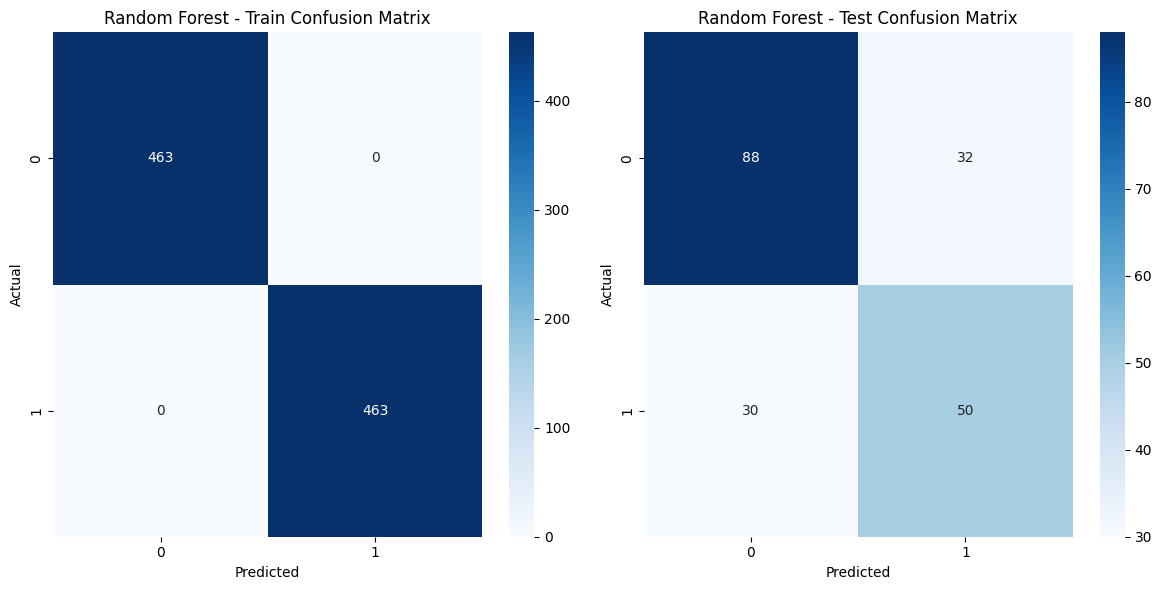

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on training and test data
y_train_pred_rf = rf_model.predict(X_train_resampled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# F1 Score and Accuracy
test_f1_rf = f1_score(y_test, y_test_pred_rf,average='weighted')

# Print the F1 score
print("Testing F1 Score:", test_f1_rf)

# Confusion Matrices
train_confusion_rf = confusion_matrix(y_train_resampled, y_train_pred_rf)
test_confusion_rf = confusion_matrix(y_test, y_test_pred_rf)

# Classification Reports
train_report_rf = classification_report(y_train_resampled, y_train_pred_rf)
test_report_rf = classification_report(y_test, y_test_pred_rf)

# Print Results
print("Random Forest Results:")

print(f"  - Classification Report (Train):\n{train_report_rf}")
print(f"  - Classification Report (Test):\n{test_report_rf}")
print(f"  - Confusion Matrix (Train):\n{train_confusion_rf}")
print(f"  - Confusion Matrix (Test):\n{test_confusion_rf}")

# Plot Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Train Confusion Matrix
sns.heatmap(train_confusion_rf, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Random Forest - Train Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Test Confusion Matrix
sns.heatmap(test_confusion_rf, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Random Forest - Test Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


We have tried several other techniques like modifying threshold from 0.5 to 0.7 and 0.4 but that couldn't improve the f1 score. aditionally we also tried hyper parameter tuning and added the tuning parameters but it couldn't extract the best model.

# Interpretability and discussion

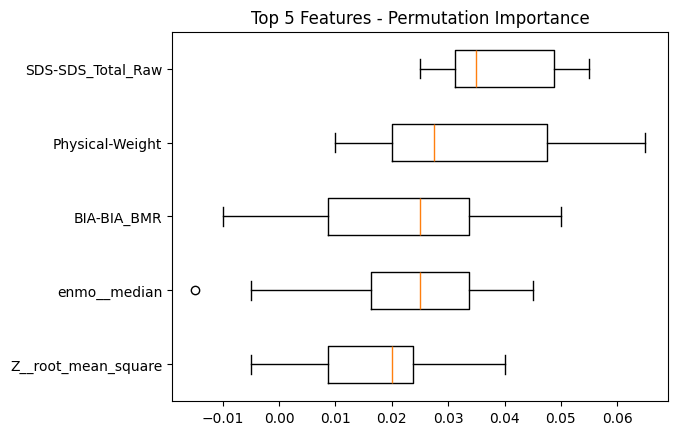

In [ ]:
import warnings

# permutation importance is on X_test
from sklearn.inspection import permutation_importance

clf = rf_model

#suppressing the warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

# Perform permutation importance with 10 repeats
result = permutation_importance(clf, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Get the feature importance scores
importance_scores = result.importances_mean

# Get the indices of the top 5 features
top5_indices = importance_scores.argsort()[-5:]

# Get the names of the top 5 features
top5_features = X_test.columns[top5_indices]


# Create a box plot to visualize the feature importance
plt.boxplot(result.importances[top5_indices].T, vert=False, labels=top5_features)
plt.title('Top 5 Features - Permutation Importance')
plt.show()


# Partial Dependence

In [ ]:
!pip install pulp
!pip install pycebox
from pycebox.ice import ice, ice_plot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 50.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3626 sha256=2420ca6d2a79417e6567f7795fe81c0d57011b1d406e09e169333df4f7d2bd06
  Stored in directory: /root/.cache/pip/wheels/af/57/4b/0d7bdd5b5ee35d225b01da15c62ed0ec0af10073f24a4a03ce
Successfully built pycebox


In [ ]:
train_X_df = pd.DataFrame(X_train, columns=X_train.columns)
train_X_df.head()

,non-wear_flag__median,light__standard_deviation,X__standard_deviation,non-wear_flag__absolute_maximum,Z__root_mean_square,quarter__standard_deviation,non-wear_flag__mean,battery_voltage__mean,anglez__median,time_of_day__standard_deviation,...,quarter__root_mean_square,BIA-BIA_DEE,BIA-BIA_BMR,Physical-Weight,Physical-Systolic_BP,Physical-Diastolic_BP,Physical-HeartRate,CGAS-CGAS_Score,FGC-FGC_CU,SDS-SDS_Total_Raw
0,0.0,88.615250,0.557440,1.0,0.504888,0.000000,0.03190,3850.230194,-1.322068,2.487233e+13,...,1.000000,1382.30,1063.310,73.8,100.0,56.0,71.0,41.0,8.0,56.000000
1,0.0,112.229261,0.579833,0.0,0.642822,0.000000,0.00000,3814.928156,13.942924,2.494077e+13,...,1.000000,2476.82,1456.950,131.0,133.0,51.0,92.0,55.0,8.0,53.000000
2,0.0,14.966637,0.386449,0.0,0.695009,0.488778,0.00000,3887.100289,-10.786225,1.357323e+13,...,3.638320,2377.10,1398.290,119.2,103.0,71.0,73.0,60.0,10.0,44.000000
3,0.0,303.785723,0.542227,0.0,0.462680,0.000000,0.00000,3991.940898,-10.904899,1.661747e+13,...,4.000000,1393.29,870.808,36.8,93.0,58.0,89.0,61.0,0.0,40.634589
4,0.0,63.916590,0.555293,1.0,0.598232,1.488966,0.04807,3839.499726,11.507783,2.511173e+13,...,2.755354,1220.80,939.078,51.0,124.0,75.0,101.0,60.0,1.0,34.000000


In [ ]:
def plot_ice_grid(dict_of_ice_dfs, data_df, features, ax_ylabel='', nrows=3,
                  ncols=3, figsize=(12, 12), sharex=False, sharey=True,
                  num_grid_points = 50,
                  subplots_kws={}, rug_kws={'color':'k'}, **ice_plot_kws):
    """A function that plots ICE plots for different features in a grid."""
    fig, axes = plt.subplots(nrows=nrows,
                             ncols=ncols,
                             figsize=figsize,
                             sharex=sharex,
                             sharey=sharey,
                             **subplots_kws)
    # for each feature plot the ice curves and add a rug at the bottom of the
    # subplot
    for f, ax in zip(features, axes.flatten()):
        ice_plot(dict_of_ice_dfs[f], ax=ax, **ice_plot_kws)
        # add the rug
        sns.distplot(data_df[f], ax=ax, hist=False, kde=False,
                     rug=True, rug_kws=rug_kws)
        ax.set_title('feature = ' + f)
        ax.set_ylabel(ax_ylabel)
        sns.despine()

    # get rid of blank plots
    for i in range(len(features), nrows*ncols):
        axes.flatten()[i].axis('off')

    return fig

Index(['Z__root_mean_square', 'enmo__median', 'BIA-BIA_BMR', 'Physical-Weight',
       'SDS-SDS_Total_Raw'],
      dtype='object')


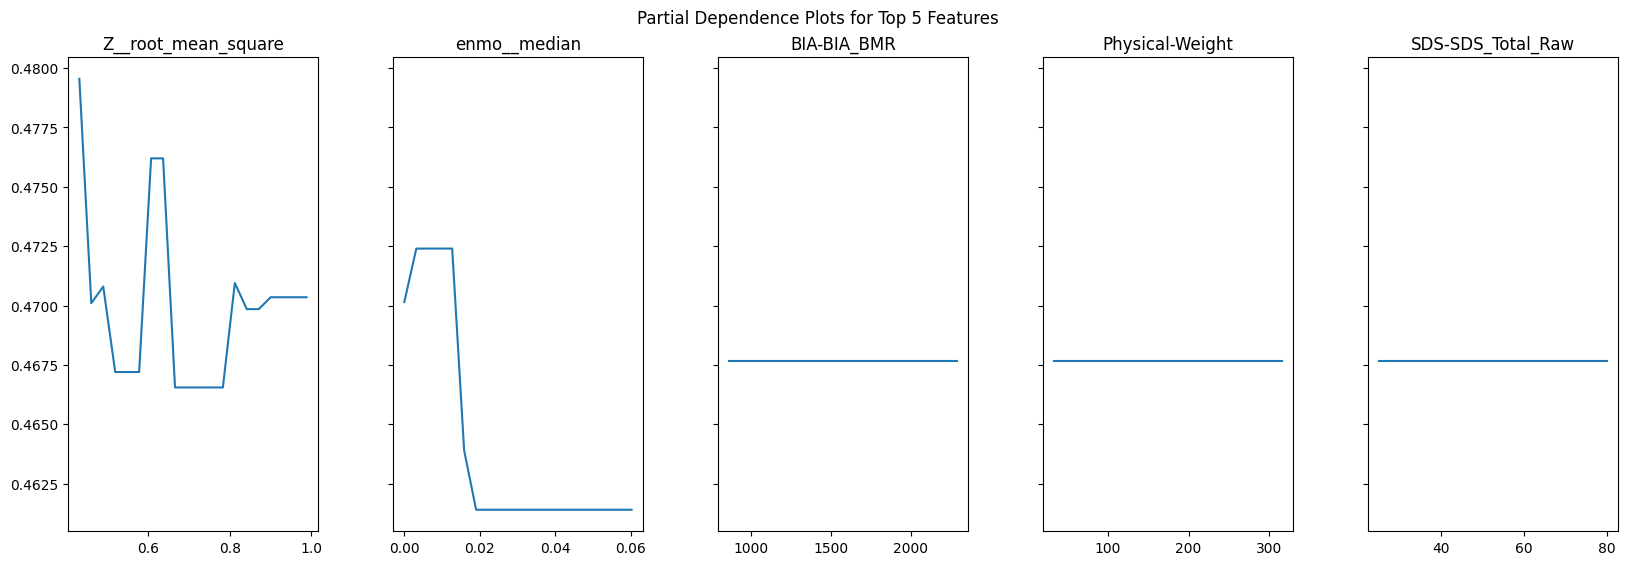

In [ ]:
features = top5_features
print(features)

def plot_partial_dependence_alt(model, X, feature_index, ax, grid_resolution=20):
    X_temp = X.copy()
    grid = np.linspace(X_temp.iloc[:, feature_index].min(), X_temp.iloc[:, feature_index].max(), num=grid_resolution)
    pdp_values = []

    for value in grid:
        X_temp.iloc[:, feature_index] = value
        preds = model.predict_proba(X_temp)[:, 1]
        pdp_values.append(np.mean(preds))

    ax.plot(grid, pdp_values)
    ax.set_title(X.columns[feature_index])

# Convert X_test to a pandas DataFrame
X_test = pd.DataFrame(X_test)

# Recode sorted_idx to contain column names instead of indices
sorted_cols = [X_test.columns[i] for i in top5_indices]

# Create partial dependence plots for the top 5 features
fig, ax = plt.subplots(1, 5, figsize=(20, 6), sharey=True)
ax = np.ravel(ax)

for i, col in enumerate(sorted_cols):
    plot_partial_dependence_alt(rf_model, X_test, X_test.columns.get_loc(col), ax[i])
    ax[i].set_title(col)

plt.suptitle('Partial Dependence Plots for Top 5 Features')
plt.subplots_adjust(top=0.9, wspace=0.3)
plt.show()


# Business Recommendations

1. Comprehensive data approach: Our analysis suggests that both detailed time series data and demographic information are valuable in predicting problematic internet usage. The combination of physical activity metrics, time-related features, and demographic data provides a more holistic view of the factors contributing to excessive internet use.

2. Focus on physical activity patterns: The model's reliance on physical activity metrics (X, Y, Z axes data) indicates that sedentary behavior is strongly correlated with problematic internet use. We recommend implementing programs that encourage regular physical activity and outdoor time for children and adolescents.

3. Time management interventions: The importance of time-related features in our model suggests that problematic internet use is often linked to poor time management. We recommend developing educational programs and tools that help young people better structure their daily routines and limit screen time.

4. Personalized interventions: Demographic data plays a significant role in our model, indicating that age, gender, and socioeconomic factors influence internet usage patterns. We recommend tailoring interventions and educational programs to specific demographic groups for maximum effectiveness.

5. Early detection system: Implement a monitoring system that uses wearable devices to track physical activity and screen time. This system can alert parents or caregivers when patterns indicative of problematic internet use emerge, allowing for early intervention.

6. Balanced lifestyle promotion: Develop awareness campaigns that emphasize the importance of a balanced lifestyle, including physical activity, social interactions, and healthy sleep patterns, as alternatives to excessive internet use.

7. Collaborative approach: Partner with schools, healthcare providers, and community organizations to create a supportive ecosystem that promotes healthy digital habits and provides resources for families dealing with problematic internet use.

**By implementing these recommendations, we can address the root causes of problematic internet usage among children and adolescents, promoting healthier digital habits and overall well-being.**

# Conclusion

**Comprehensive Data Approach:** The project integrates data from multiple sources, including physical activity metrics, time-related information, and demographics, allowing for a holistic analysis.

**Early Detection and Intervention:** The model aims to identify early signs of problematic internet use through physical activity data, enabling timely interventions to promote healthier digital habits.

**Feature Importance:**  Physical activity metrics (X, Y, Z axes data) and time-related information are crucial for the predictive model. Careful feature selection is essential for model effectiveness.

**Wearable Technology:** The use of readily available physical activity data, likely from wearable devices, suggests potential for real-world application and scalability.

**Mental Health Consideration:** Mental health scores are significant indicators, highlighting the need for a balanced approach that considers both physical and mental well-being.
These insights can guide the development of targeted interventions and health monitoring systems to address problematic internet usage among youth1


# Appendix

Testing F1 Score (Gradient Boosting): 0.6669887692426306
Gradient Boosting Results:
  - Classification Report (Train):
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       463
         1.0       0.88      0.91      0.90       463

    accuracy                           0.89       926
   macro avg       0.89      0.89      0.89       926
weighted avg       0.89      0.89      0.89       926

  - Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71       120
         1.0       0.57      0.62      0.60        80

    accuracy                           0.67       200
   macro avg       0.65      0.66      0.66       200
weighted avg       0.67      0.67      0.67       200

  - Confusion Matrix (Train):
[[405  58]
 [ 40 423]]
  - Confusion Matrix (Test):
[[83 37]
 [30 50]]


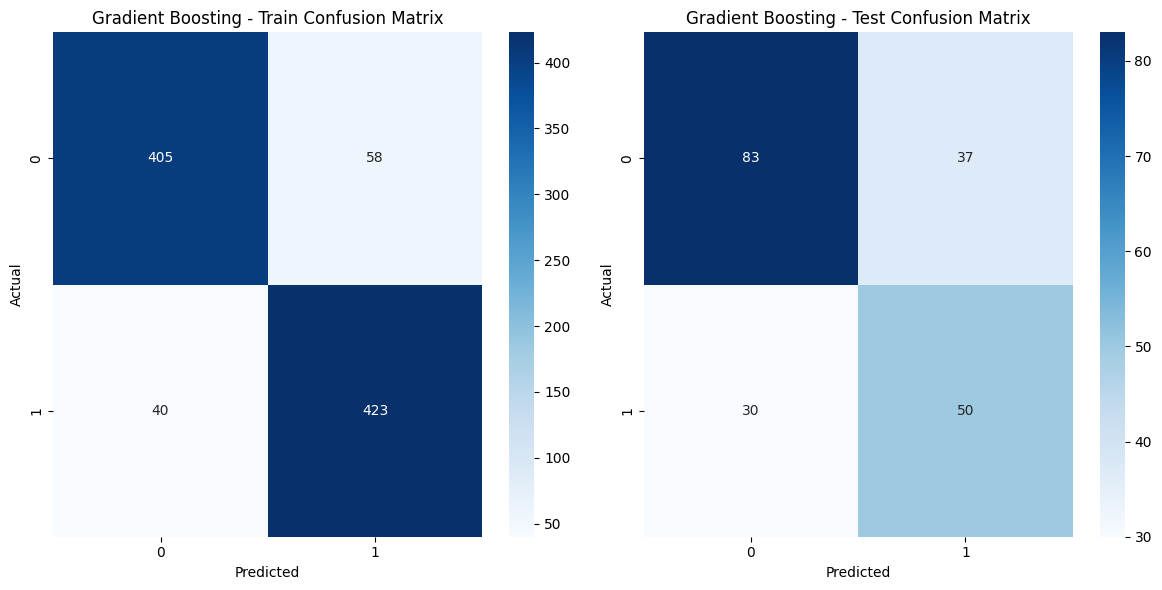

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the model
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train_resampled, y_train_resampled)

# Predict on training and test data
y_train_pred_gbc = gbc_model.predict(X_train_resampled)
y_test_pred_gbc = gbc_model.predict(X_test_scaled)

# F1 Score and Accuracy
test_f1_gbc = f1_score(y_test, y_test_pred_gbc, average='weighted')

# Print the F1 score
print("Testing F1 Score (Gradient Boosting):", test_f1_gbc)

# Confusion Matrices
train_confusion_gbc = confusion_matrix(y_train_resampled, y_train_pred_gbc)
test_confusion_gbc = confusion_matrix(y_test, y_test_pred_gbc)

# Classification Reports
train_report_gbc = classification_report(y_train_resampled, y_train_pred_gbc)
test_report_gbc = classification_report(y_test, y_test_pred_gbc)

# Print Results
print("Gradient Boosting Results:")
print(f"  - Classification Report (Train):\n{train_report_gbc}")
print(f"  - Classification Report (Test):\n{test_report_gbc}")
print(f"  - Confusion Matrix (Train):\n{train_confusion_gbc}")
print(f"  - Confusion Matrix (Test):\n{test_confusion_gbc}")

# Plot Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Train Confusion Matrix
sns.heatmap(train_confusion_gbc, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Gradient Boosting - Train Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Test Confusion Matrix
sns.heatmap(test_confusion_gbc, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Gradient Boosting - Test Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


Testing F1 Score (XGBoost): 0.6546308619744775
XGBoost Results:
  - Classification Report (Train):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       463
         1.0       1.00      1.00      1.00       463

    accuracy                           1.00       926
   macro avg       1.00      1.00      1.00       926
weighted avg       1.00      1.00      1.00       926

  - Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.71      0.72      0.71       120
         1.0       0.57      0.56      0.57        80

    accuracy                           0.66       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.65      0.66      0.65       200

  - Confusion Matrix (Train):
[[463   0]
 [  0 463]]
  - Confusion Matrix (Test):
[[86 34]
 [35 45]]


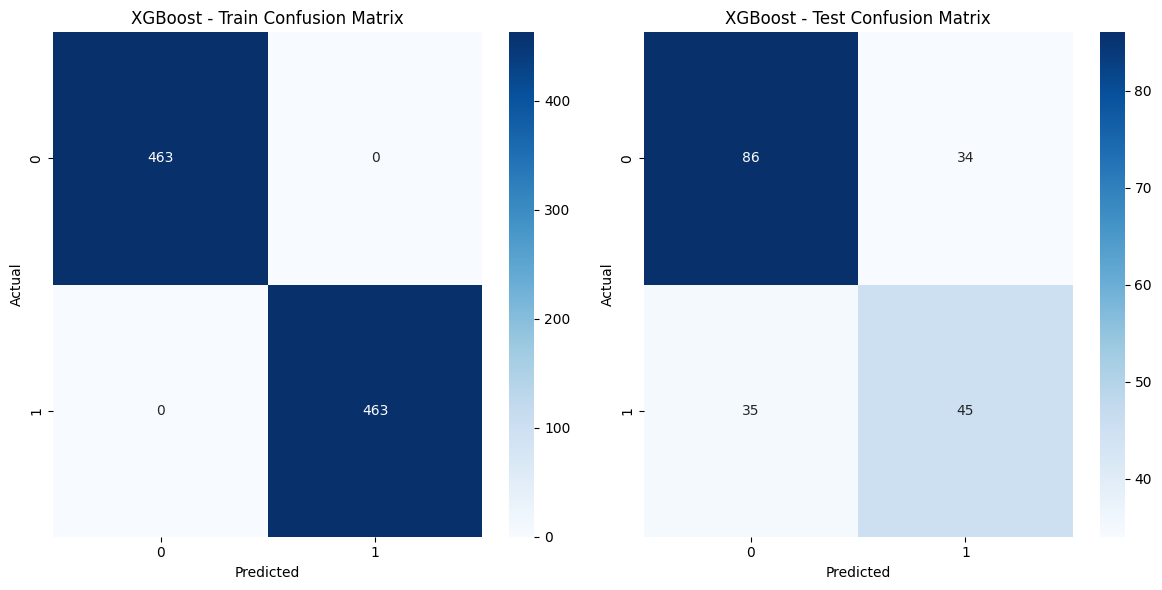

In [ ]:
import xgboost as xgb
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on training and test data
y_train_pred_xgb = xgb_model.predict(X_train_resampled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# F1 Score and Accuracy
test_f1_xgb = f1_score(y_test, y_test_pred_xgb, average='weighted')

# Print the F1 score
print("Testing F1 Score (XGBoost):", test_f1_xgb)

# Confusion Matrices
train_confusion_xgb = confusion_matrix(y_train_resampled, y_train_pred_xgb)
test_confusion_xgb = confusion_matrix(y_test, y_test_pred_xgb)

# Classification Reports
train_report_xgb = classification_report(y_train_resampled, y_train_pred_xgb)
test_report_xgb = classification_report(y_test, y_test_pred_xgb)

# Print Results
print("XGBoost Results:")
print(f"  - Classification Report (Train):\n{train_report_xgb}")
print(f"  - Classification Report (Test):\n{test_report_xgb}")
print(f"  - Confusion Matrix (Train):\n{train_confusion_xgb}")
print(f"  - Confusion Matrix (Test):\n{test_confusion_xgb}")

# Plot Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Train Confusion Matrix
sns.heatmap(train_confusion_xgb, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('XGBoost - Train Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Test Confusion Matrix
sns.heatmap(test_confusion_xgb, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('XGBoost - Test Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


Testing F1 Score (Neural Network): 0.6570481354886791
Neural Network Results:
  - Classification Report (Train):
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79       463
         1.0       0.78      0.83      0.80       463

    accuracy                           0.80       926
   macro avg       0.80      0.80      0.80       926
weighted avg       0.80      0.80      0.80       926

  - Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.73      0.68      0.70       120
         1.0       0.56      0.61      0.59        80

    accuracy                           0.66       200
   macro avg       0.64      0.65      0.65       200
weighted avg       0.66      0.66      0.66       200

  - Confusion Matrix (Train):
[[354 109]
 [ 79 384]]
  - Confusion Matrix (Test):
[[82 38]
 [31 49]]


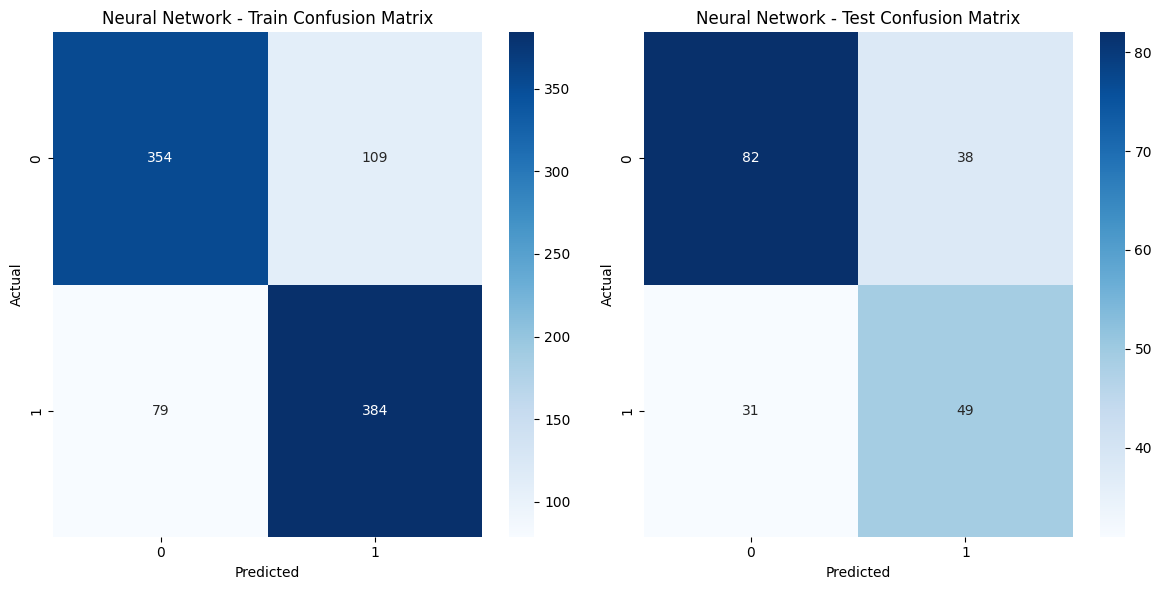

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the model
nn_model = MLPClassifier(random_state=42, max_iter=500)
nn_model.fit(X_train_resampled, y_train_resampled)

# Predict on training and test data
y_train_pred_nn = nn_model.predict(X_train_resampled)
y_test_pred_nn = nn_model.predict(X_test_scaled)

# F1 Score and Accuracy
test_f1_nn = f1_score(y_test, y_test_pred_nn, average='weighted')

# Print the F1 score
print("Testing F1 Score (Neural Network):", test_f1_nn)

# Confusion Matrices
train_confusion_nn = confusion_matrix(y_train_resampled, y_train_pred_nn)
test_confusion_nn = confusion_matrix(y_test, y_test_pred_nn)

# Classification Reports
train_report_nn = classification_report(y_train_resampled, y_train_pred_nn)
test_report_nn = classification_report(y_test, y_test_pred_nn)

# Print Results
print("Neural Network Results:")
print(f"  - Classification Report (Train):\n{train_report_nn}")
print(f"  - Classification Report (Test):\n{test_report_nn}")
print(f"  - Confusion Matrix (Train):\n{train_confusion_nn}")
print(f"  - Confusion Matrix (Test):\n{test_confusion_nn}")

# Plot Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Train Confusion Matrix
sns.heatmap(train_confusion_nn, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Neural Network - Train Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Test Confusion Matrix
sns.heatmap(test_confusion_nn, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Neural Network - Test Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()
